# AIVLE스쿨 2차 미니프로젝트: 신규 아파트 주차 수요 예측

<img src = "https://github.com/Jangrae/img/blob/master/parking.png?raw=true" width=800, align="left"/>

# 단계 2: 탐색적 데이터 분석

## [미션]

단계1 에서 생성한 데이터에 대해서 탐색적 분석을 수행합니다.

1) 단변량 분석
    - 숫자형, 범주형 변수에 맞게 데이터를 탐색하며 비즈니스적 의미를 파악합니다.
2) 이변량 분석
    - 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
    - 범주형 변수 → 실차량수 관계를 분석합니다.
3) 전처리(추가)
    - 범주형 변수 중에는 범줏값 개수가 적은 범주들은 유사한 범주끼리 묶어 봅니다.
    - 불필요한 변수를 제거합니다.

## 1. 환경설정

### (1) 로컬 수행(Anaconda)

- project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [8]:
# 기본 경로
path = ''

### (2) 구글 콜랩 수행

- 구글 콜랩을 사용중이면 구글 드라이브를 연결합니다.

In [10]:
# 구글 드라이브 연결, 패스 지정
import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    path = '/content/drive/MyDrive/project/'

### (3) 한글 폰트 표시용 라이브러리 설치

In [12]:
# 한글 표시를 위한 라이브러리 설치
#!pip install koreanize_matplotlib -q

### (4) 라이브러리 불러오기

In [14]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

import joblib
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

### (5) 데이터 불러오기

- joblib.dump() 함수를 사용해 이전에 저장했던 base_data1.pkl 파일을 읽어옵니다.
- 읽어온 데이터를 apart 데이터프레임으로 선언합니다.

#### 1) 데이터 불러오기

In [17]:
# 파일 불러오기
apart = joblib.load(path+'base_data1.pkl')

#### 2) 기본 정보 조회

In [19]:
apart.head()

,단지코드,총면적,총세대수,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수,면적10-30,면적30-40,면적40-50,면적50-60,면적60-70,면적70-80,면적80-200,임대보증금,임대료
0,C0001,6023.7683,78,서울,2013,계단식,개별가스난방,전체동 설치,109,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,C0002,1569.1668,35,서울,2013,복도식,개별가스난방,전체동 설치,35,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,C0003,7180.1396,88,서울,2013,계단식,개별가스난방,전체동 설치,88,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,C0004,47058.9273,477,서울,2014,복도식,지역난방,전체동 설치,943,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,C0006,543.0268,15,서울,2013,복도식,개별가스난방,전체동 설치,21,15,0,0,0,0,0,0,5.522750e+07,340148.333333


In [20]:
apart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      345 non-null    object 
 1   총면적       345 non-null    float64
 2   총세대수      345 non-null    int64  
 3   지역        345 non-null    object 
 4   준공연도      345 non-null    int32  
 5   건물형태      345 non-null    object 
 6   난방방식      345 non-null    object 
 7   승강기설치여부   345 non-null    object 
 8   실차량수      345 non-null    int64  
 9   면적10-30   345 non-null    int64  
 10  면적30-40   345 non-null    int64  
 11  면적40-50   345 non-null    int64  
 12  면적50-60   345 non-null    int64  
 13  면적60-70   345 non-null    int64  
 14  면적70-80   345 non-null    int64  
 15  면적80-200  345 non-null    int64  
 16  임대보증금     345 non-null    float64
 17  임대료       345 non-null    float64
dtypes: float64(3), int32(1), int64(9), object(5)
memory usage: 47.3+ KB


## 2. 기본 분석

- 기술통계정보, 결측치 확인 등 기본 분석을 수행합니다.

In [22]:
apart.isnull().sum()

단지코드        0
총면적         0
총세대수        0
지역          0
준공연도        0
건물형태        0
난방방식        0
승강기설치여부     0
실차량수        0
면적10-30     0
면적30-40     0
면적40-50     0
면적50-60     0
면적60-70     0
면적70-80     0
면적80-200    0
임대보증금       0
임대료         0
dtype: int64

In [23]:
apart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      345 non-null    object 
 1   총면적       345 non-null    float64
 2   총세대수      345 non-null    int64  
 3   지역        345 non-null    object 
 4   준공연도      345 non-null    int32  
 5   건물형태      345 non-null    object 
 6   난방방식      345 non-null    object 
 7   승강기설치여부   345 non-null    object 
 8   실차량수      345 non-null    int64  
 9   면적10-30   345 non-null    int64  
 10  면적30-40   345 non-null    int64  
 11  면적40-50   345 non-null    int64  
 12  면적50-60   345 non-null    int64  
 13  면적60-70   345 non-null    int64  
 14  면적70-80   345 non-null    int64  
 15  면적80-200  345 non-null    int64  
 16  임대보증금     345 non-null    float64
 17  임대료       345 non-null    float64
dtypes: float64(3), int32(1), int64(9), object(5)
memory usage: 47.3+ KB


In [24]:
apart.describe()

,총면적,총세대수,준공연도,실차량수,면적10-30,면적30-40,면적40-50,면적50-60,면적60-70,면적70-80,면적80-200,임대보증금,임대료
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,3.450000e+02,345.000000
mean,37282.661962,546.759420,2007.713043,555.431884,45.837681,169.347826,147.620290,132.889855,1.852174,16.895652,34.515942,2.382737e+07,197729.050210
std,29588.197927,432.359538,7.261036,374.640474,161.133746,223.039796,216.584543,252.947082,32.771294,76.441995,116.975949,2.247481e+07,158760.777669
min,68.930000,1.000000,1992.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,11293.832100,178.000000,2003.000000,258.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.272491e+07,112905.000000
50%,32190.360000,491.000000,2008.000000,498.000000,0.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.930850e+07,172000.000000
75%,56189.979600,853.000000,2013.000000,822.000000,0.000000,298.000000,264.000000,150.000000,0.000000,0.000000,0.000000,2.837700e+07,227564.000000
max,150126.863200,2289.000000,2022.000000,1657.000000,1181.000000,1429.000000,1258.000000,1444.000000,608.000000,756.000000,850.000000,1.898219e+08,950305.000000


## 3. 단변량 분석

- 주요 변수들을 연속형, 범주형으로 구분하여 데이터 분포를 살펴보며 비즈니스적인 의미를 파악합니다.
    - 연속형: '실차량수', '총세대수', '총면적', '준공연도', '임대료', '임대보증금'
    - 범주형: '지역', '건물형태', '난방방식', '승강기설치여부'
- 전용면적구간은 pd.melt() 함수를 사용해 pivot을 해제한 후 분석합니다.

### (1) 연속형 변수

- 대상: '실차량수', '총세대수', '총면적', '준공연도', '임대료', '임대보증금'
- 기술통계, Histogram, Boxplot 등을 사용해 데이터 분포를 파악합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [27]:
# 함수 만들기
def continuous(data,col_name):
    plt.figure(figsize=(10,5))

    #히스토그램 그리기
    plt.subplot(1,2,1)
    sns.histplot(data[col_name], bins=5, edgecolor='gray',kde=True)
    plt.xlabel(col_name)
    plt.ylabel('count')
    plt.title(f'Histogram of {col_name}')

    #박스플롯 그리기
    plt.subplot(1,2,2)
    plt.boxplot(data[col_name])
    plt.xlabel(col_name)
    plt.ylabel('count')
    plt.title(f'Boxplot of {col_name}')

    #플롯 출력
    plt.tight_layout()
    plt.show()

#### 1) 실차량수

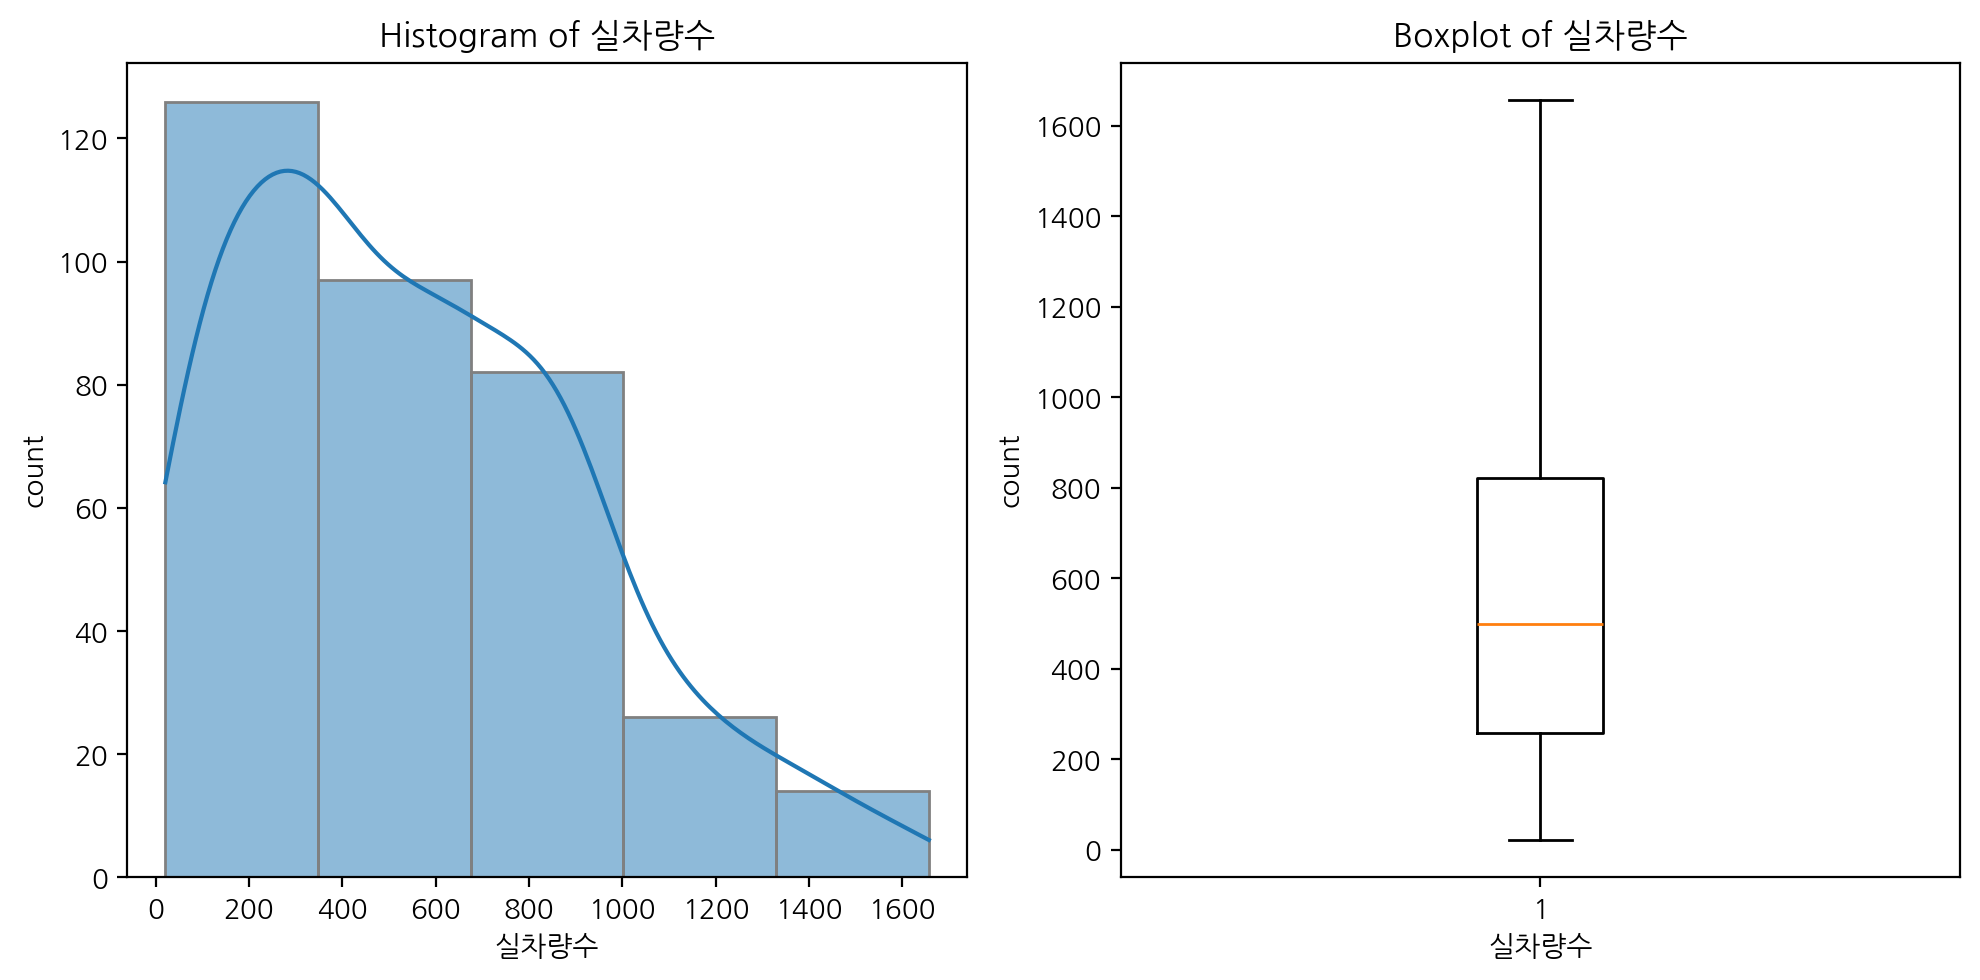

In [29]:
continuous(apart,'실차량수')

#### 2) 총세대수

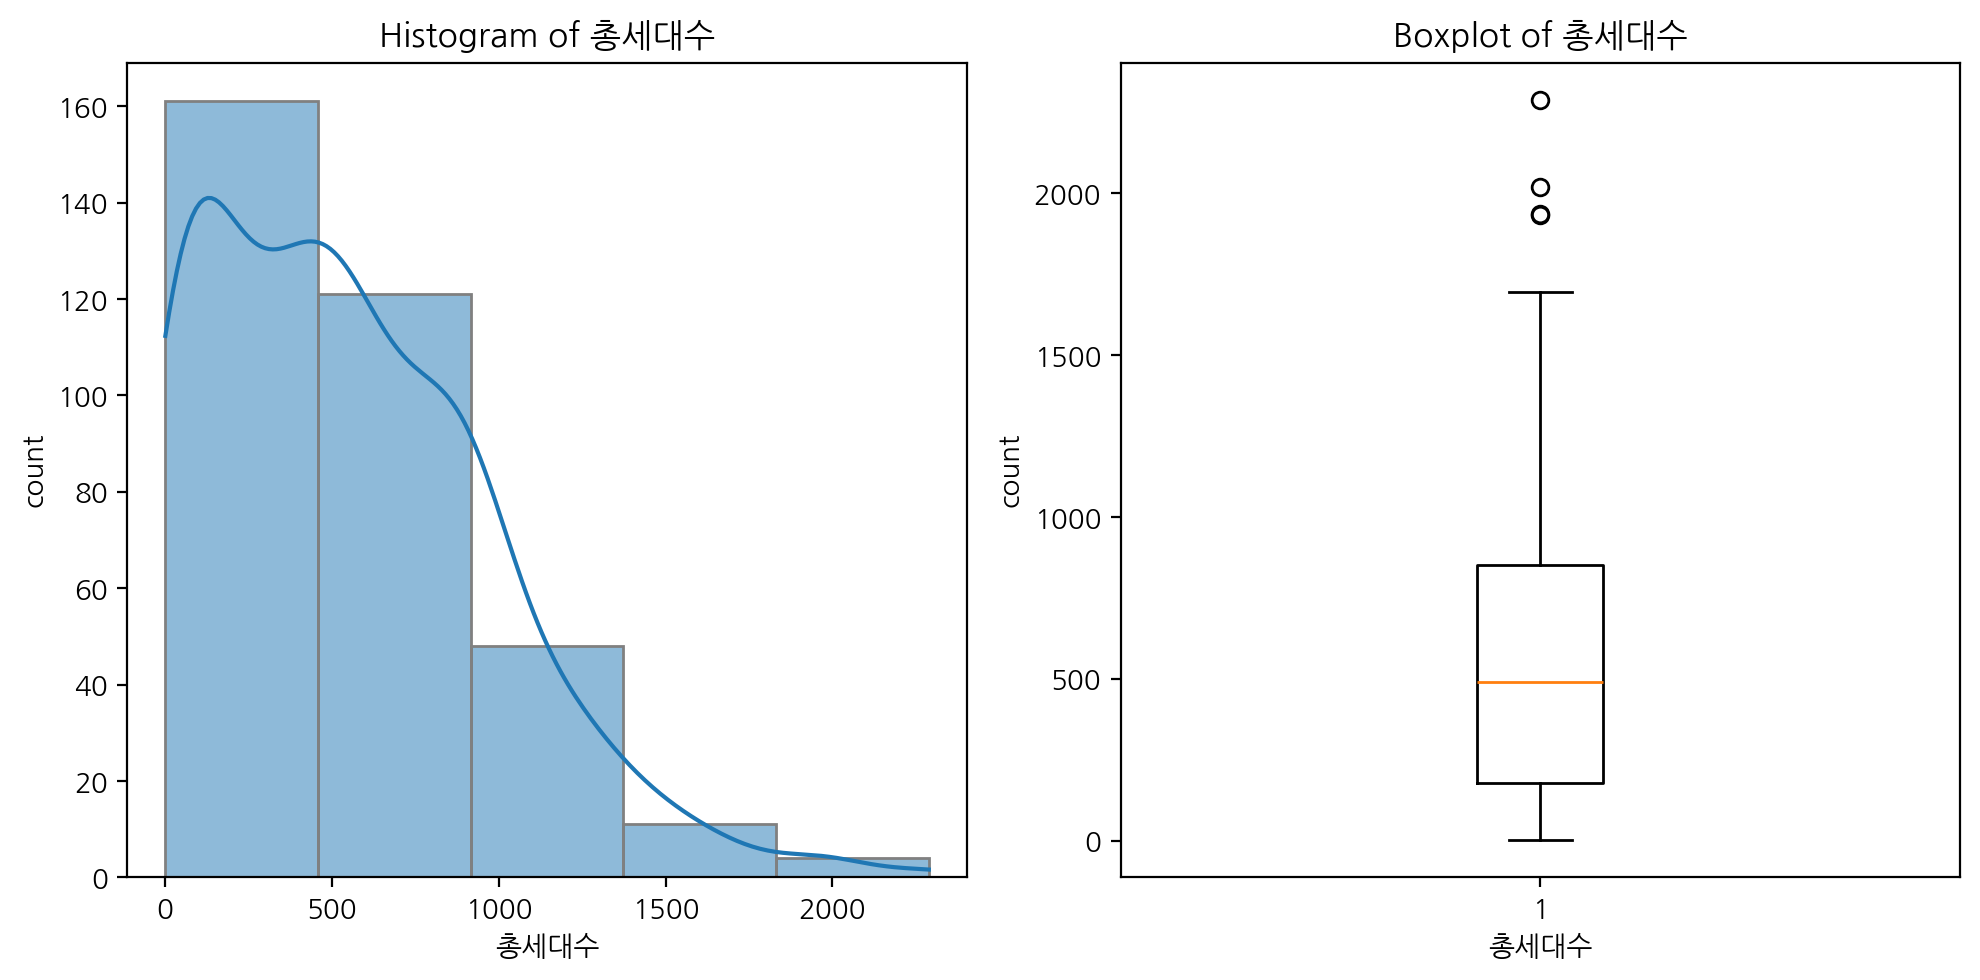

In [31]:
continuous(apart,'총세대수')

#### 3) 총면적

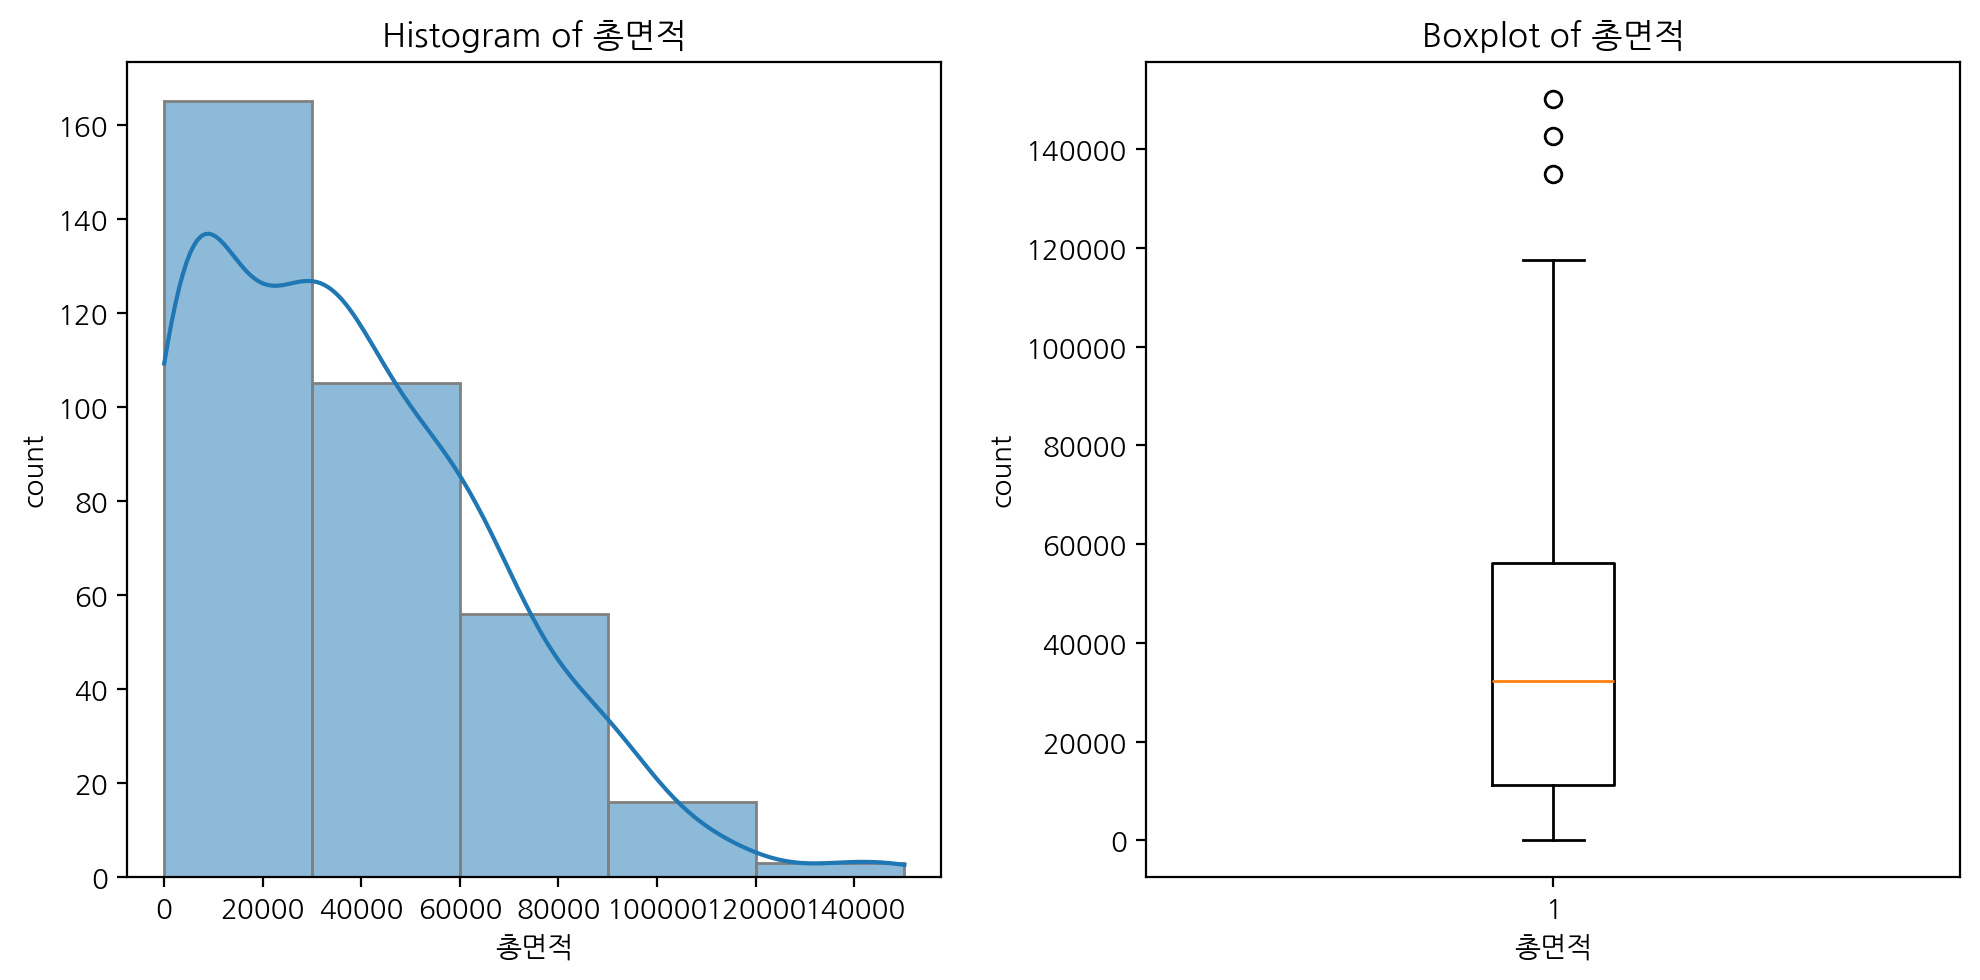

In [33]:
continuous(apart,'총면적')

#### 4) 준공연도

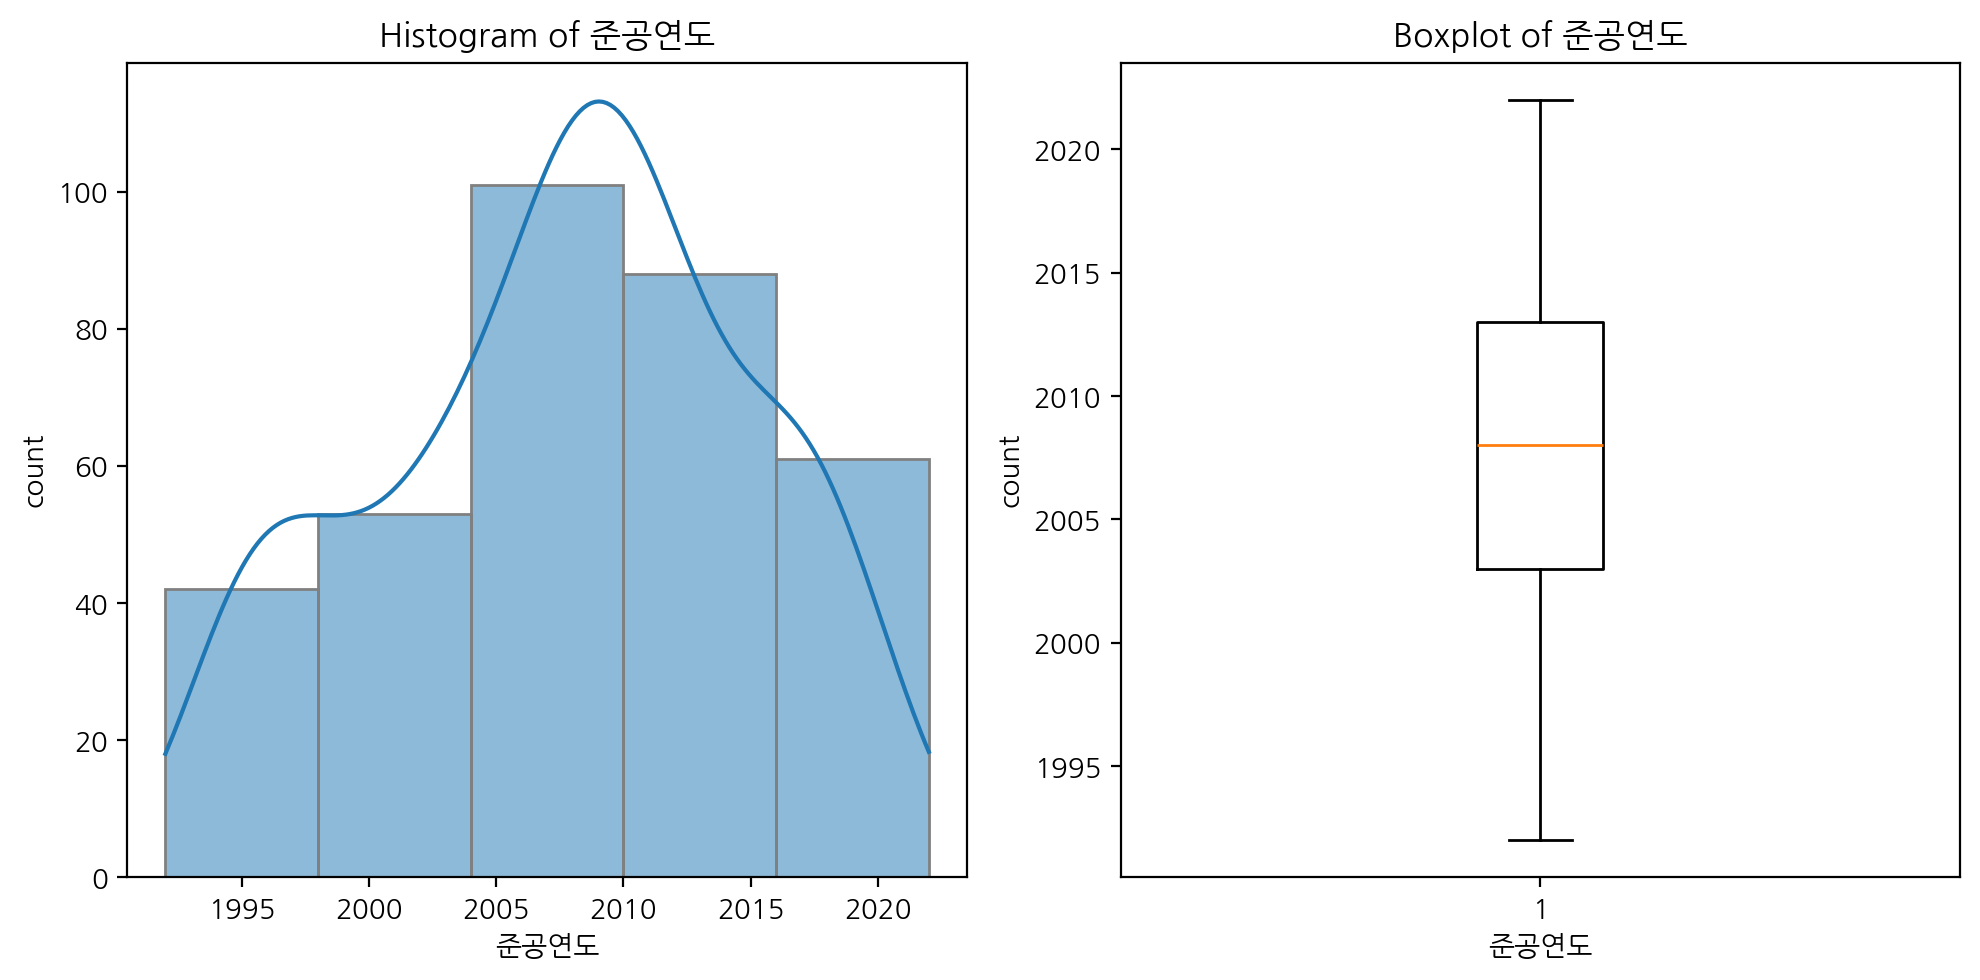

In [35]:
continuous(apart,'준공연도')

#### 5) 임대료

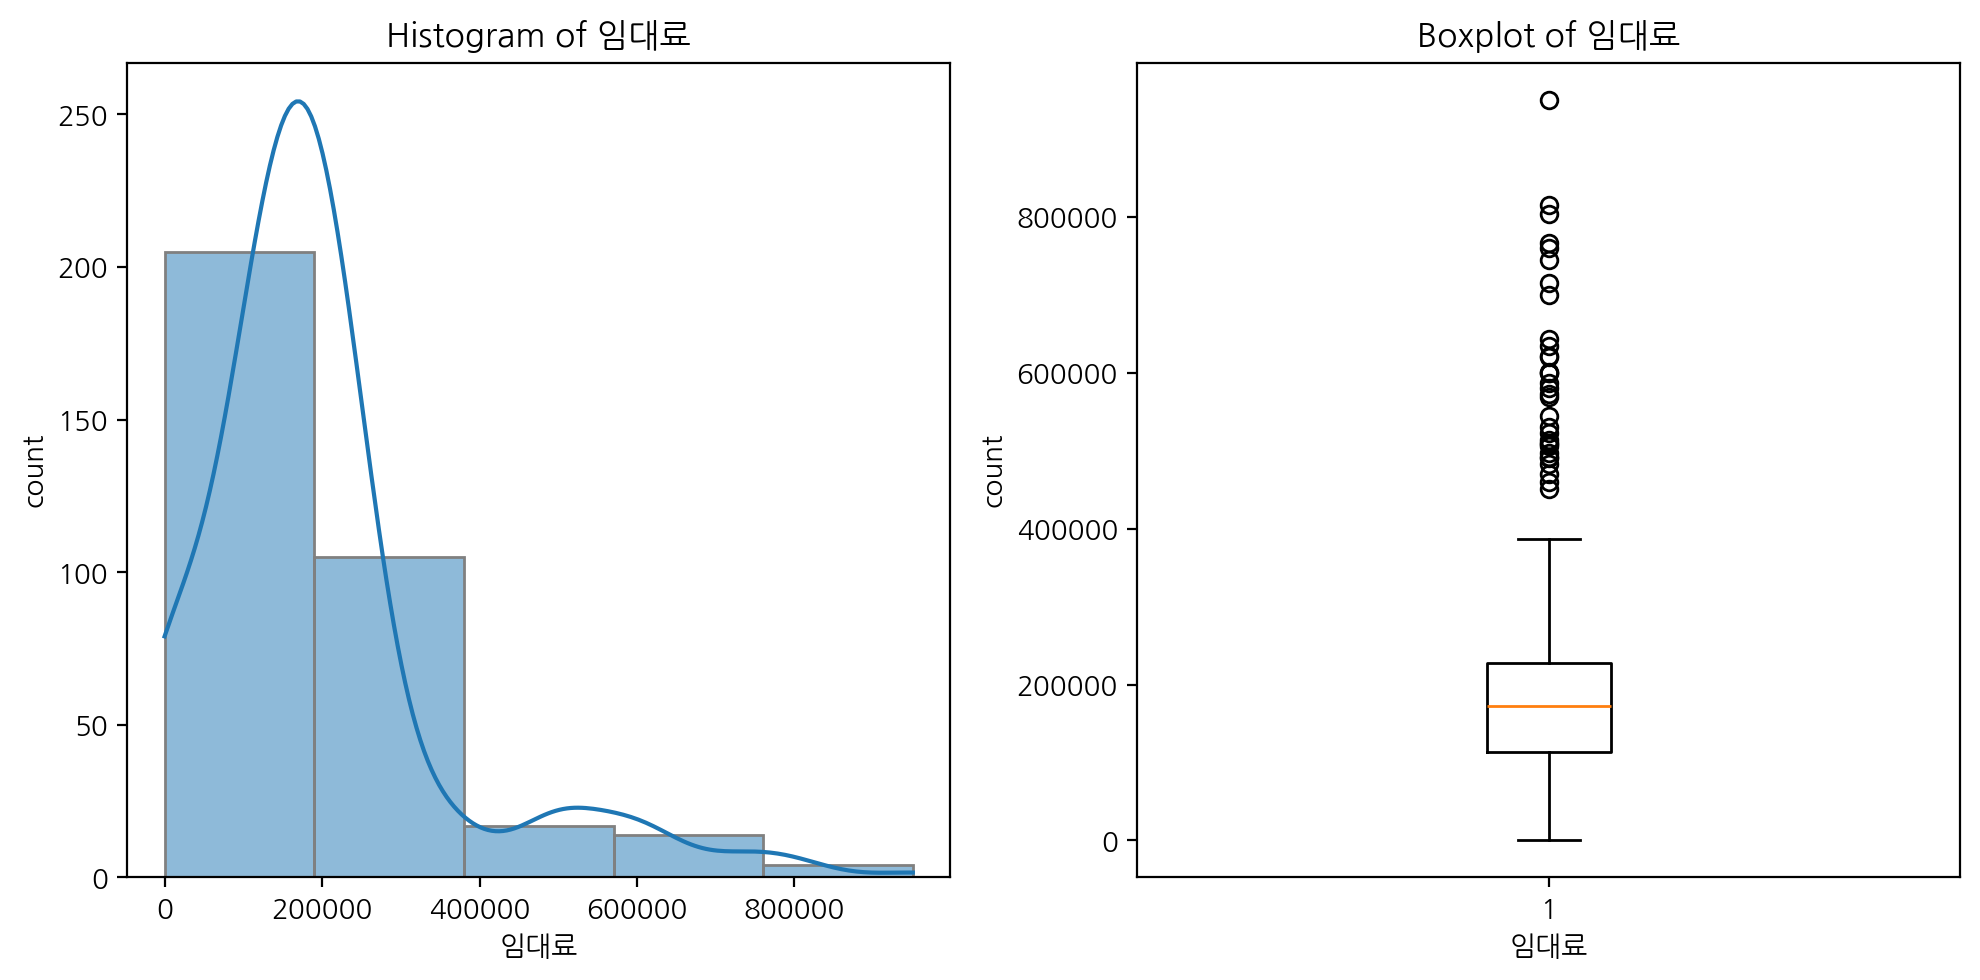

In [37]:
continuous(apart,'임대료')

#### 6) 임대보증금

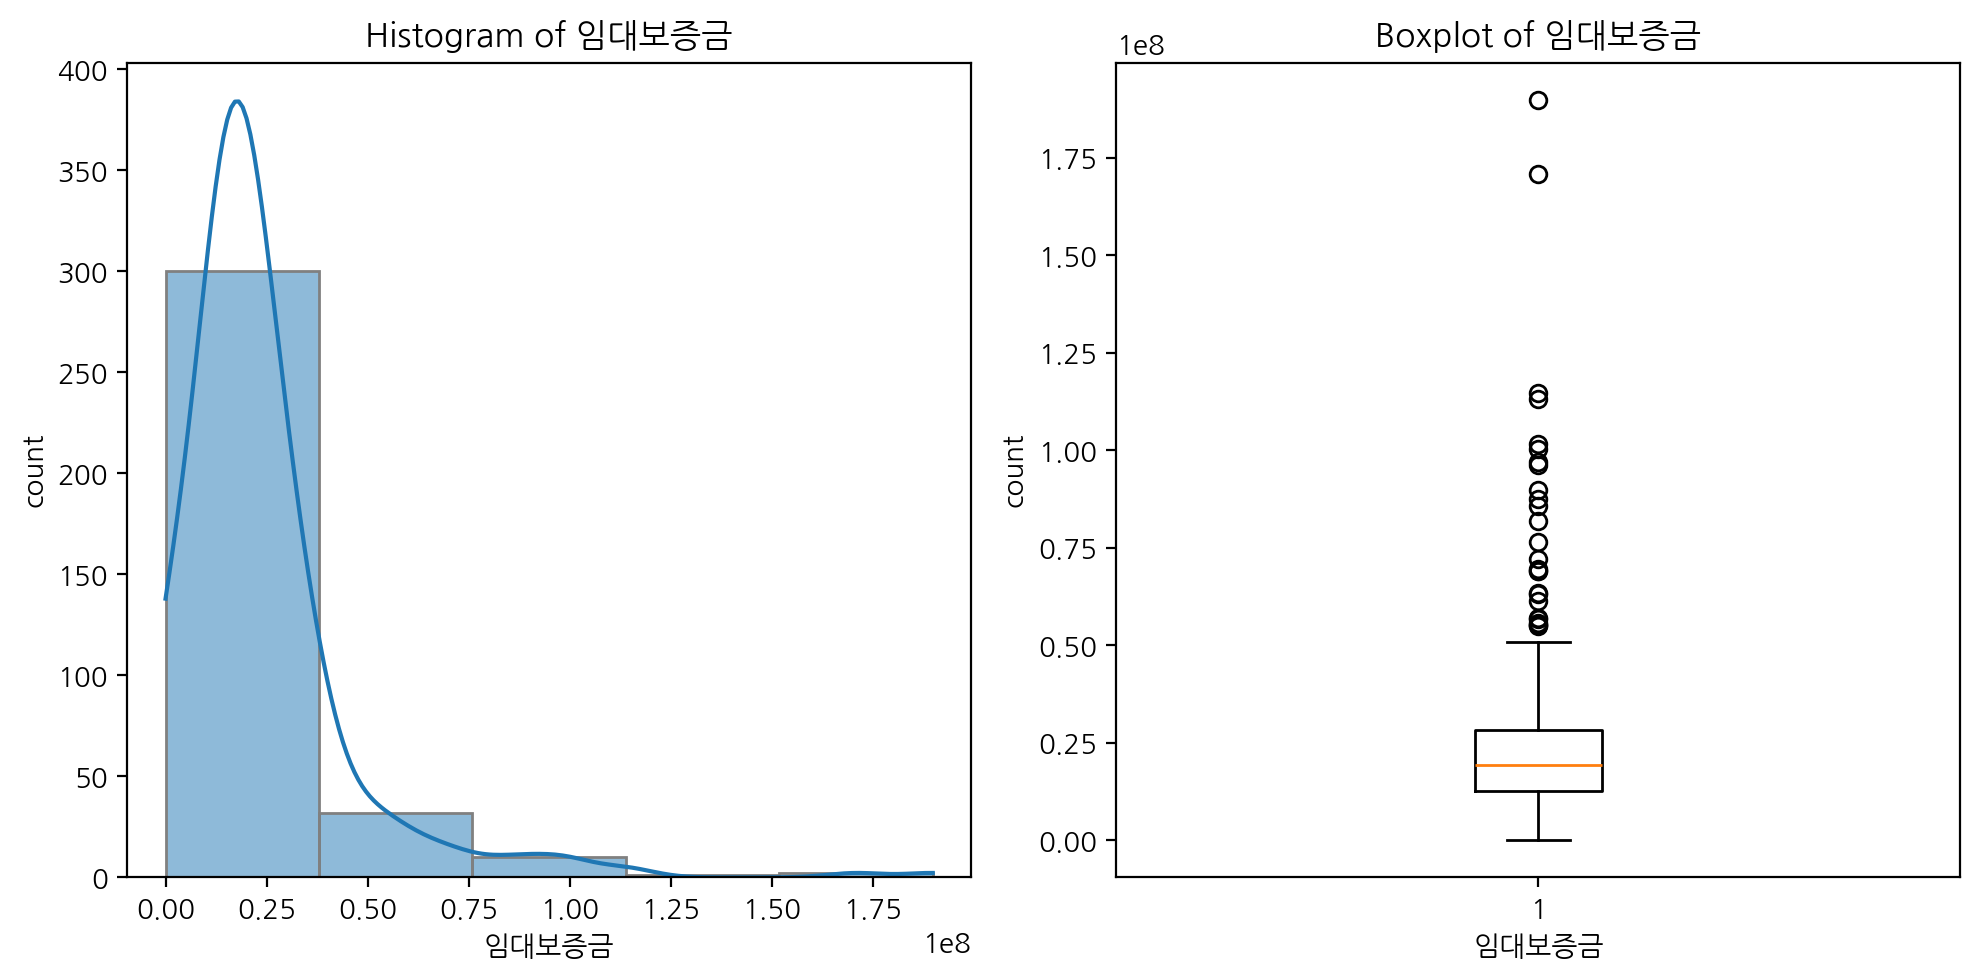

In [39]:
continuous(apart,'임대보증금')

- 총세대수, 총면적, 임대료, 임대보증금 데이터 상에 이상치가 있는 것을 확인
- 특히 임대료, 임대보증금상에 이상치가 많이 분포되어 있으므로 전처리 과정이 필요하다고 판단

### (2) 범주형 변수

- 대상: '지역', '건물형태', '난방방식', '승강기설치여부'
- sns.countplot() 함수 등을 사용해 데이터 분포를 확인합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [42]:
# 함수 만들기
def plot_category(df,col_name):
    plt.figure(figsize=(10,5))
    order = df[col_name].value_counts(ascending=False).index
    sns.countplot(x=col_name, data=df, order=order)
    plt.grid()
    plt.show()

#### 1) 지역

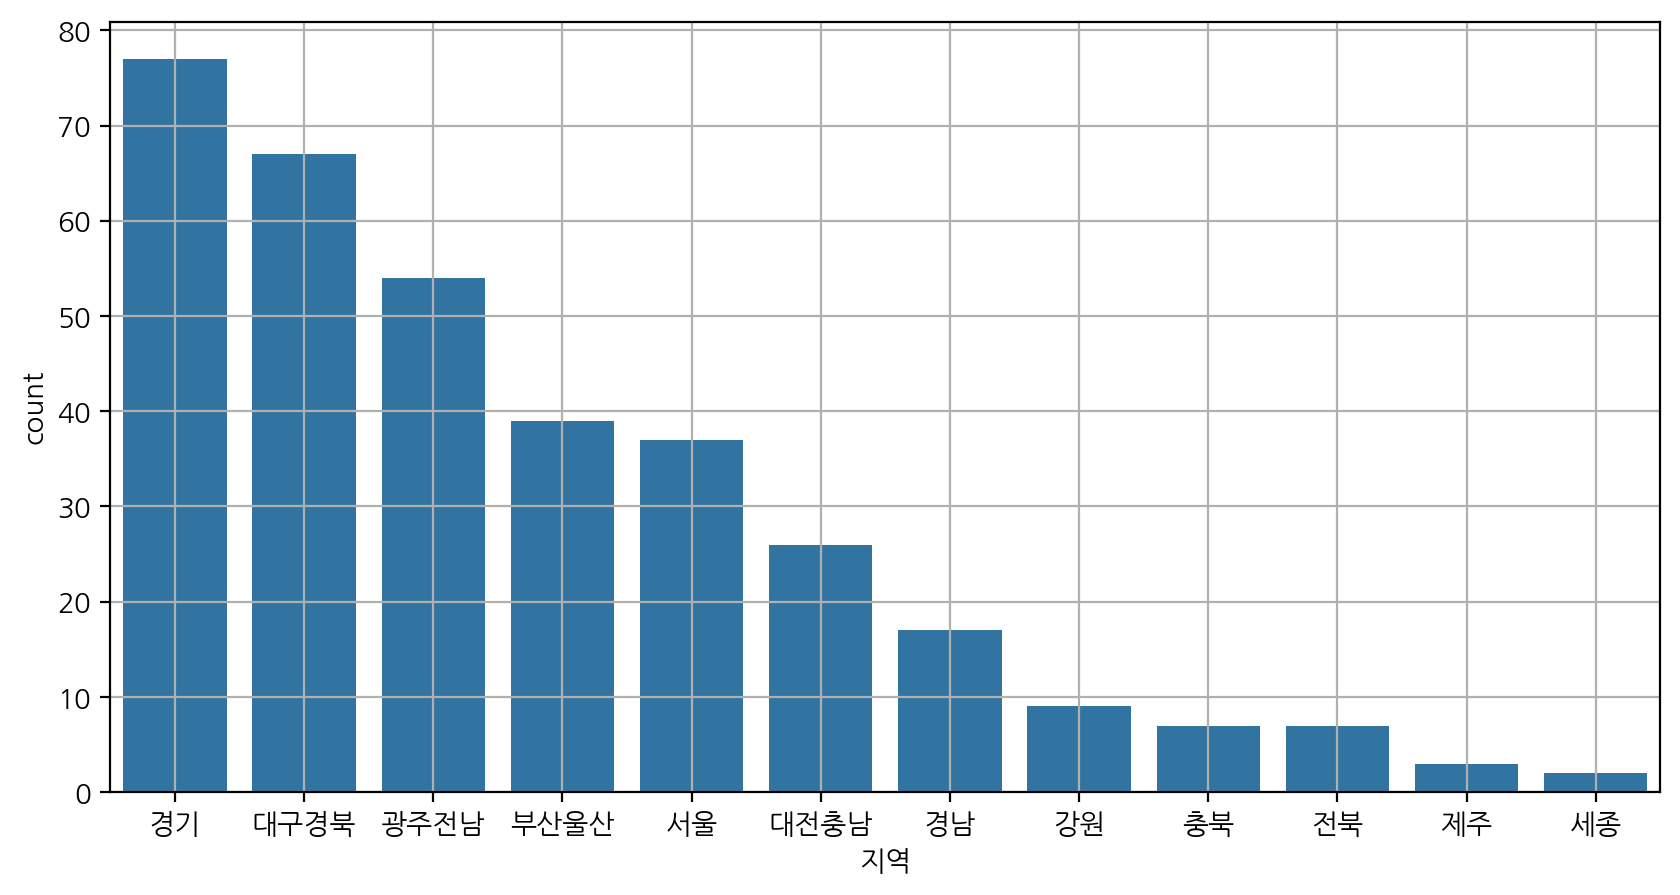

In [44]:
plot_category(apart,'지역')

#### 2) 건물형태

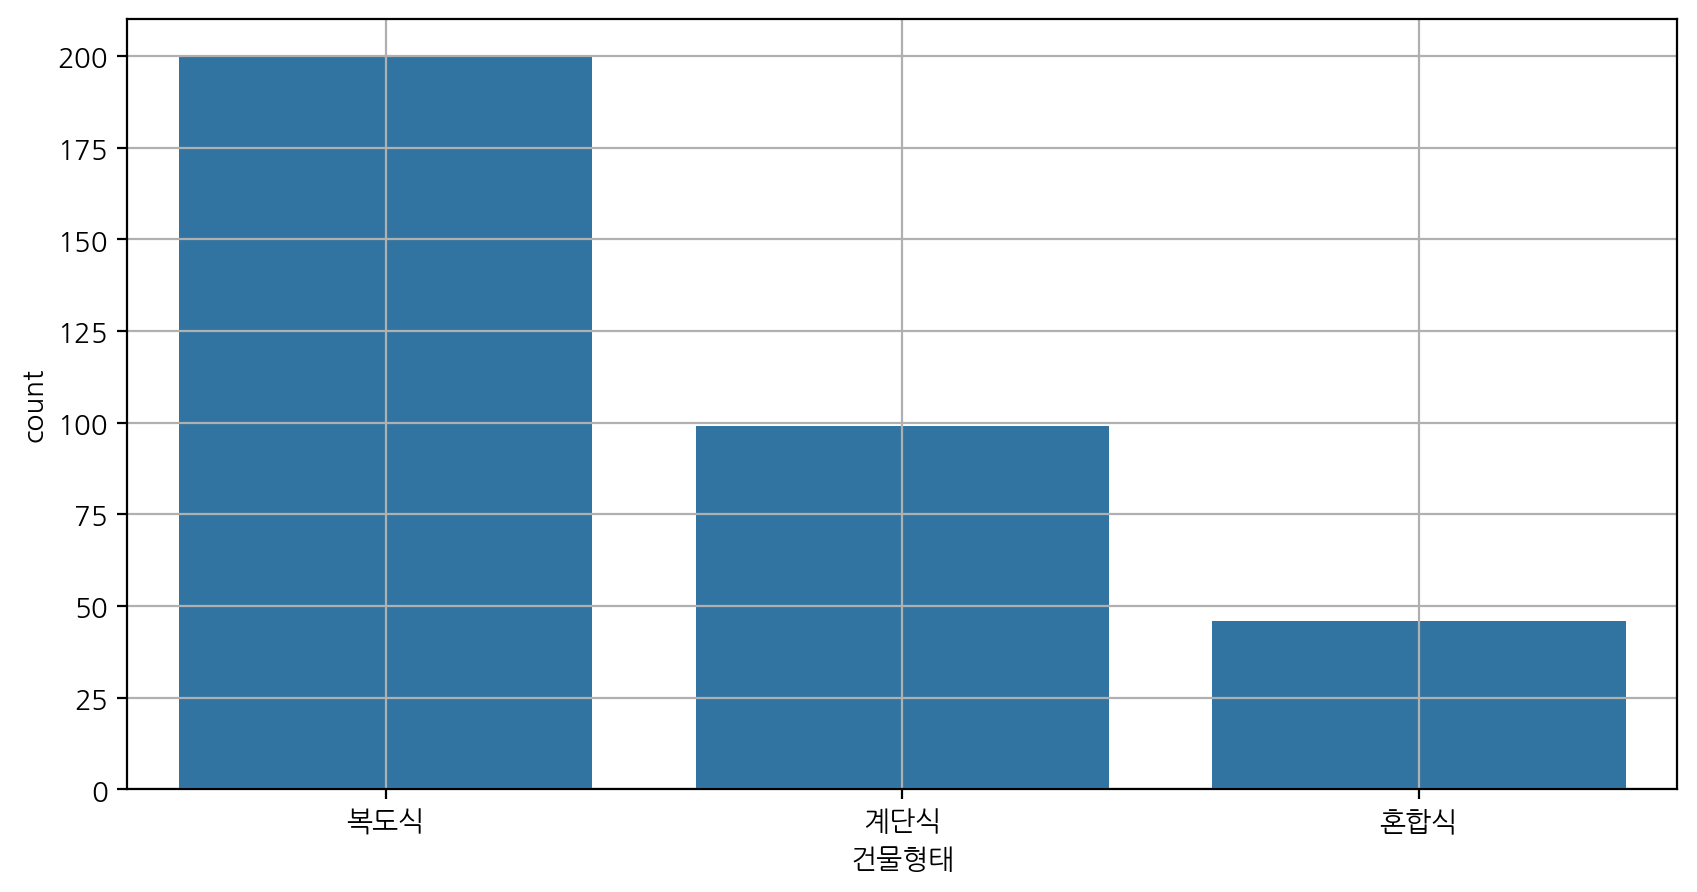

In [46]:
plot_category(apart,'건물형태')

#### 3) 난방방식

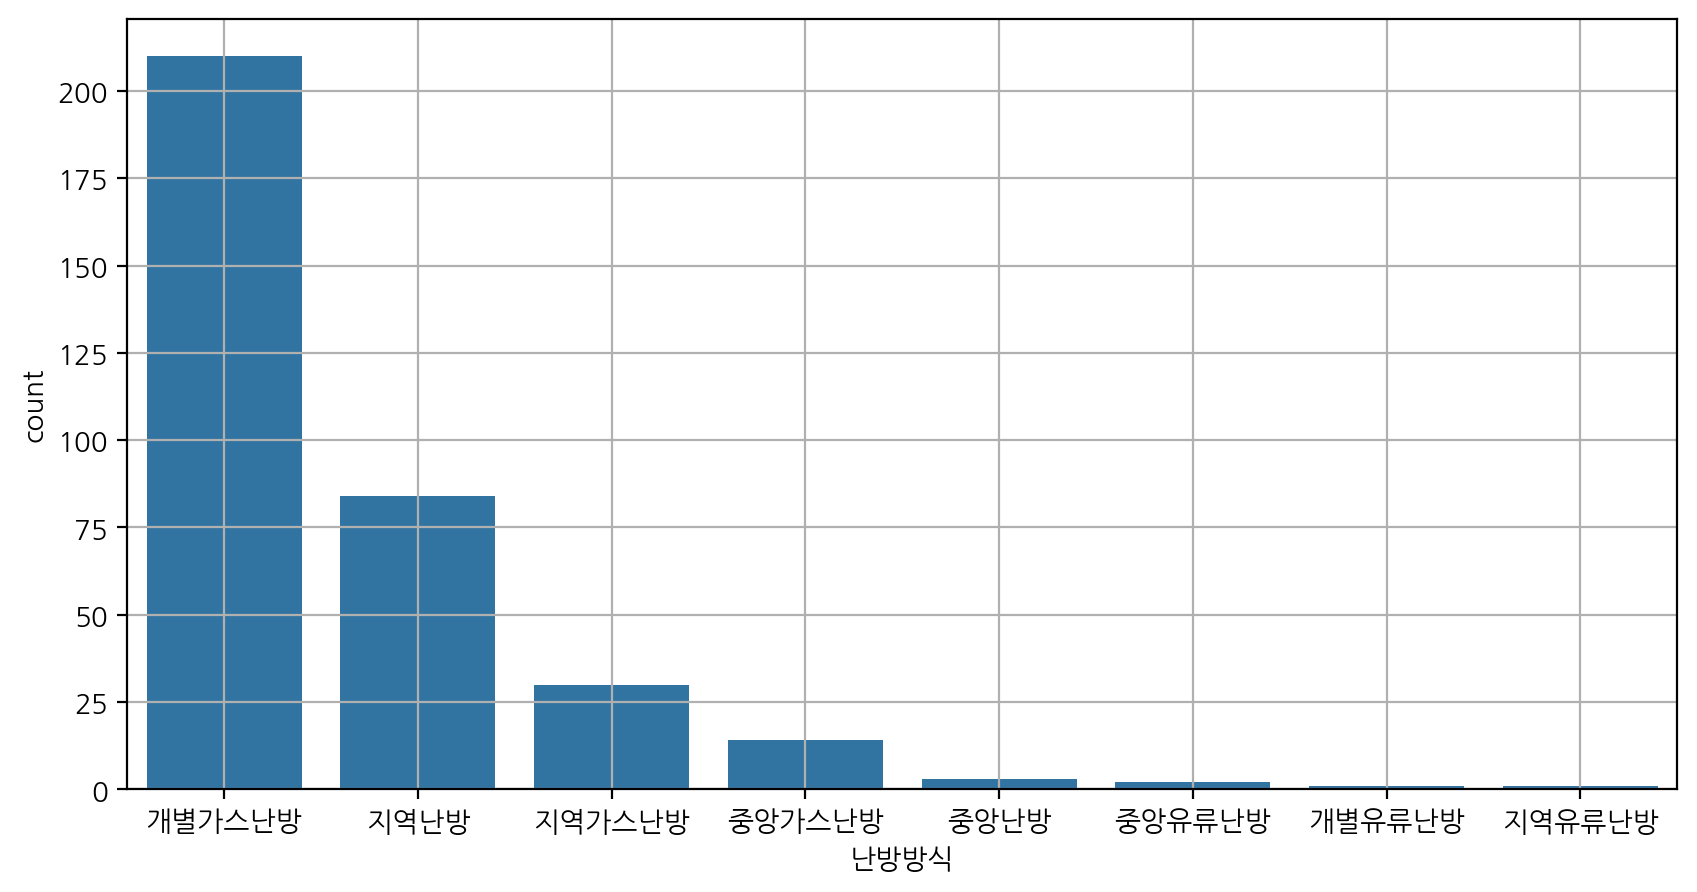

In [48]:
plot_category(apart,'난방방식')

#### 4) 승강기설치여부

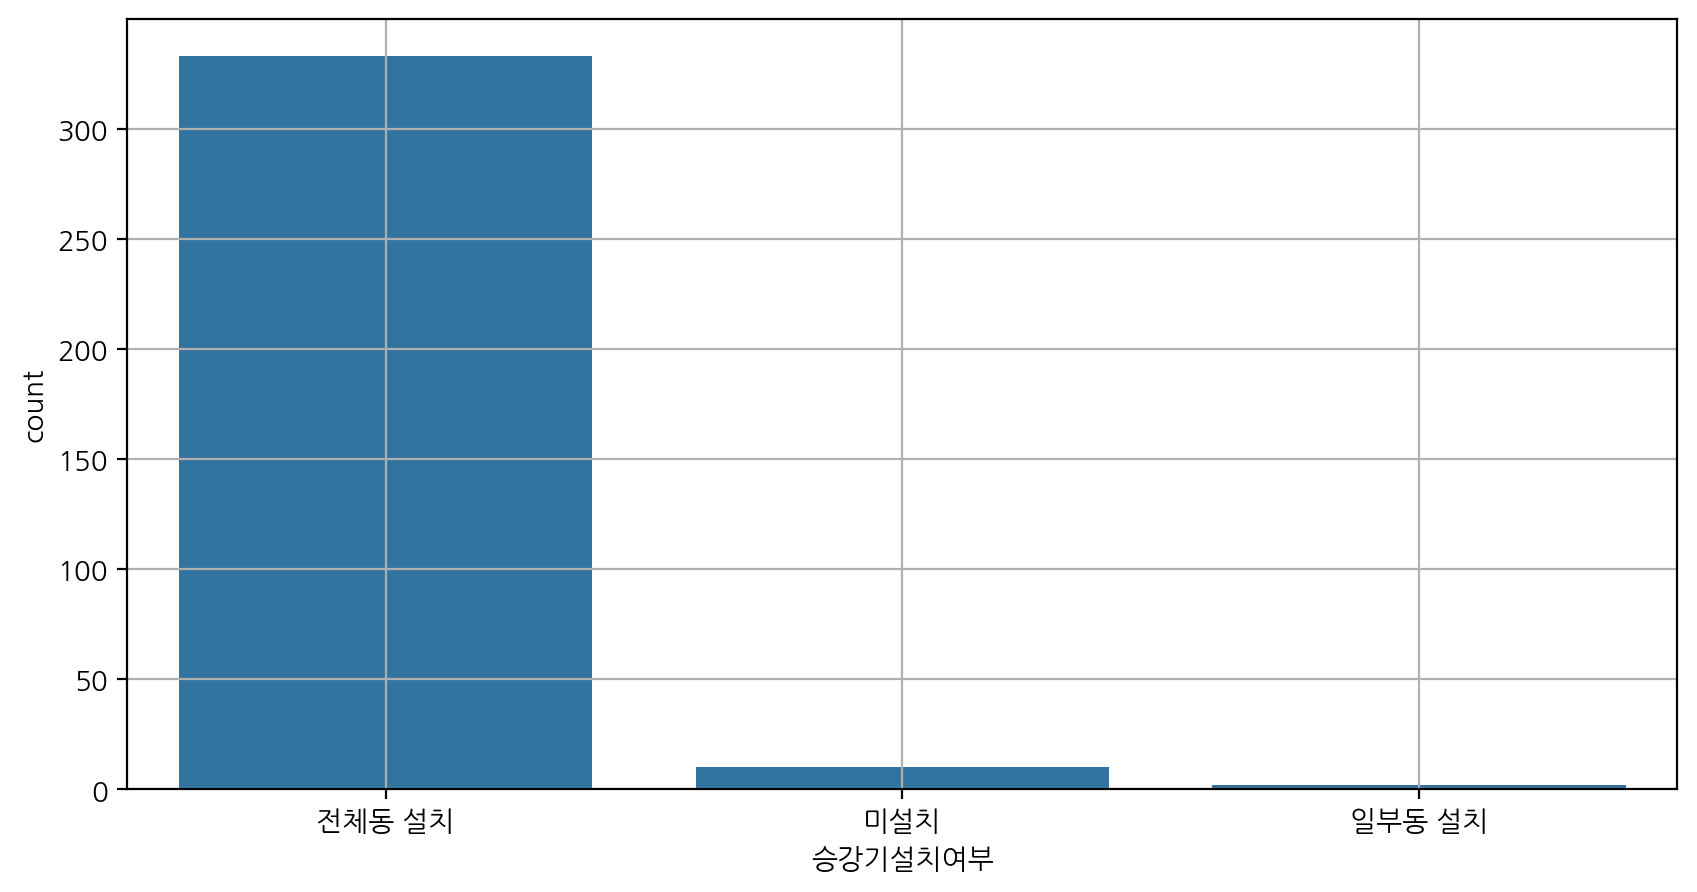

In [50]:
plot_category(apart,'승강기설치여부')

#### 5) 전용면적구간

- 전용면적구간은 pd.melt() 함수를 사용해 pivot을 해제하여 전용면적구간별 세대수를 분석합니다.

In [52]:
apart.columns

Index(['단지코드', '총면적', '총세대수', '지역', '준공연도', '건물형태', '난방방식', '승강기설치여부', '실차량수',
       '면적10-30', '면적30-40', '면적40-50', '면적50-60', '면적60-70', '면적70-80',
       '면적80-200', '임대보증금', '임대료'],
      dtype='object')

<Axes: xlabel='전용면적구간', ylabel='세대수'>

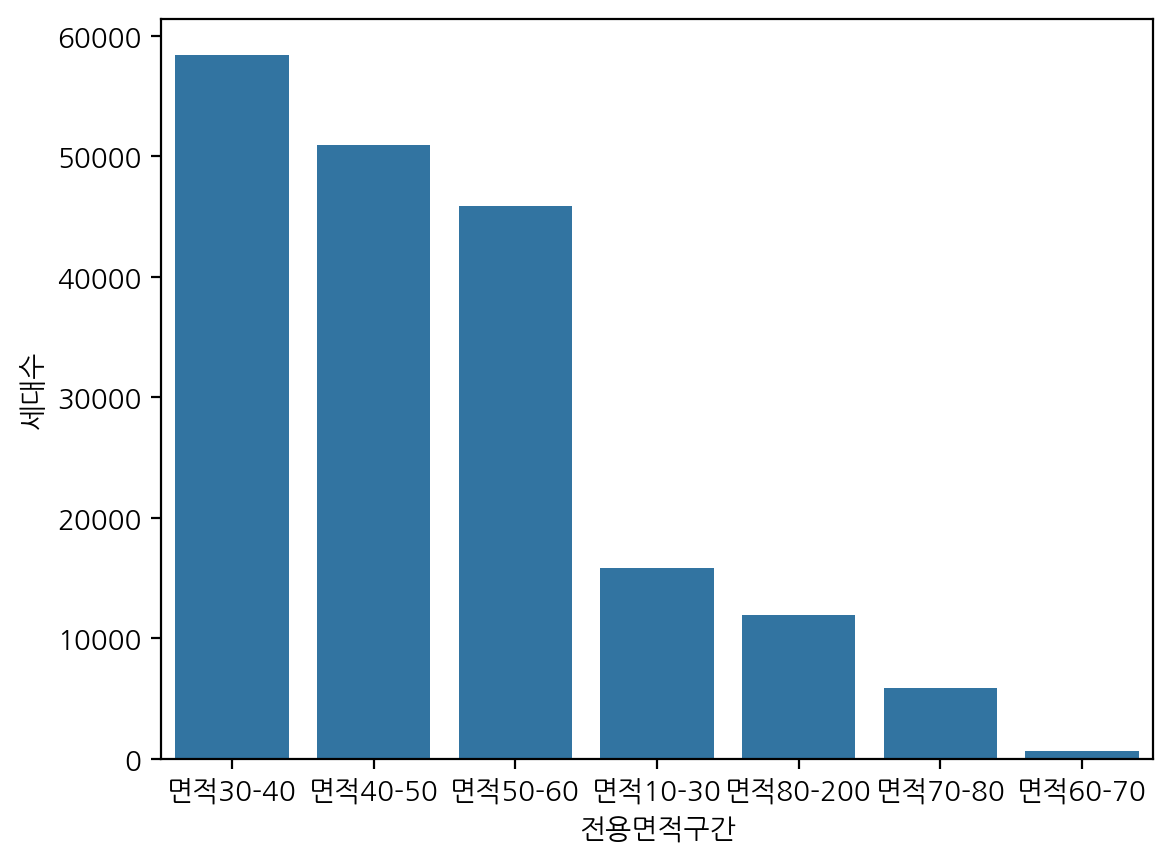

In [53]:
apart_melted=pd.melt(apart,id_vars=['단지코드','총면적','총세대수','지역','준공연도','건물형태','난방방식','승강기설치여부','실차량수','임대보증금','임대료'],var_name='전용면적구간',value_name='세대수',ignore_index=False)
apart_grouped=apart_melted.groupby('전용면적구간', as_index=True)['세대수'].sum()
apart_grouped=apart_grouped.reset_index()
apart_grouped = apart_grouped.sort_values(by='세대수', ascending=False)
sns.barplot(x='전용면적구간', y='세대수', data=apart_grouped)

## 4. 이변량 분석

- 숫자형 변수들 간의 상관관계를 분석합니다.
- 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
- 볌주형 변수 → 실차량수 관계를 분석합니다.

### (1) 숫자형 변수들 간의 상관관계

- 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
- 숫자형 변수들 간의 상관관계를 df.corr() 메서드와 sns.heatmap() 함수 등을 사용해 시각화 합니다.

In [56]:
apart.corr(numeric_only=True)

,총면적,총세대수,준공연도,실차량수,면적10-30,면적30-40,면적40-50,면적50-60,면적60-70,면적70-80,면적80-200,임대보증금,임대료
총면적,1.000000,0.927286,0.171747,0.822183,0.174025,0.410497,0.486441,0.457999,0.102296,0.327435,0.304440,0.361495,0.368626
총세대수,0.927286,1.000000,0.085396,0.712475,0.373339,0.597814,0.589794,0.387626,0.056001,0.092164,0.021211,0.172154,0.203985
준공연도,0.171747,0.085396,1.000000,0.287266,0.120319,-0.159878,-0.059953,0.079040,0.066059,0.248191,0.229966,0.331838,0.325513
실차량수,0.822183,0.712475,0.287266,1.000000,0.077284,0.211912,0.392055,0.381746,0.151615,0.339168,0.340284,0.361867,0.337066
면적10-30,0.174025,0.373339,0.120319,0.077284,1.000000,0.161576,0.047730,-0.124520,-0.016124,-0.063058,-0.084182,-0.087044,-0.062674
면적30-40,0.410497,0.597814,-0.159878,0.211912,0.161576,1.000000,0.376596,-0.132072,-0.043037,-0.168306,-0.224689,-0.121064,-0.085508
면적40-50,0.486441,0.589794,-0.059953,0.392055,0.047730,0.376596,1.000000,-0.074343,-0.038634,-0.151085,-0.201694,-0.069538,-0.068149
면적50-60,0.457999,0.387626,0.079040,0.381746,-0.124520,-0.132072,-0.074343,1.000000,-0.029779,-0.078286,-0.125007,0.141206,0.164231
면적60-70,0.102296,0.056001,0.066059,0.151615,-0.016124,-0.043037,-0.038634,-0.029779,1.000000,0.265453,-0.016725,0.032534,0.114207
면적70-80,0.327435,0.092164,0.248191,0.339168,-0.063058,-0.168306,-0.151085,-0.078286,0.265453,1.000000,0.550601,0.444749,0.480862


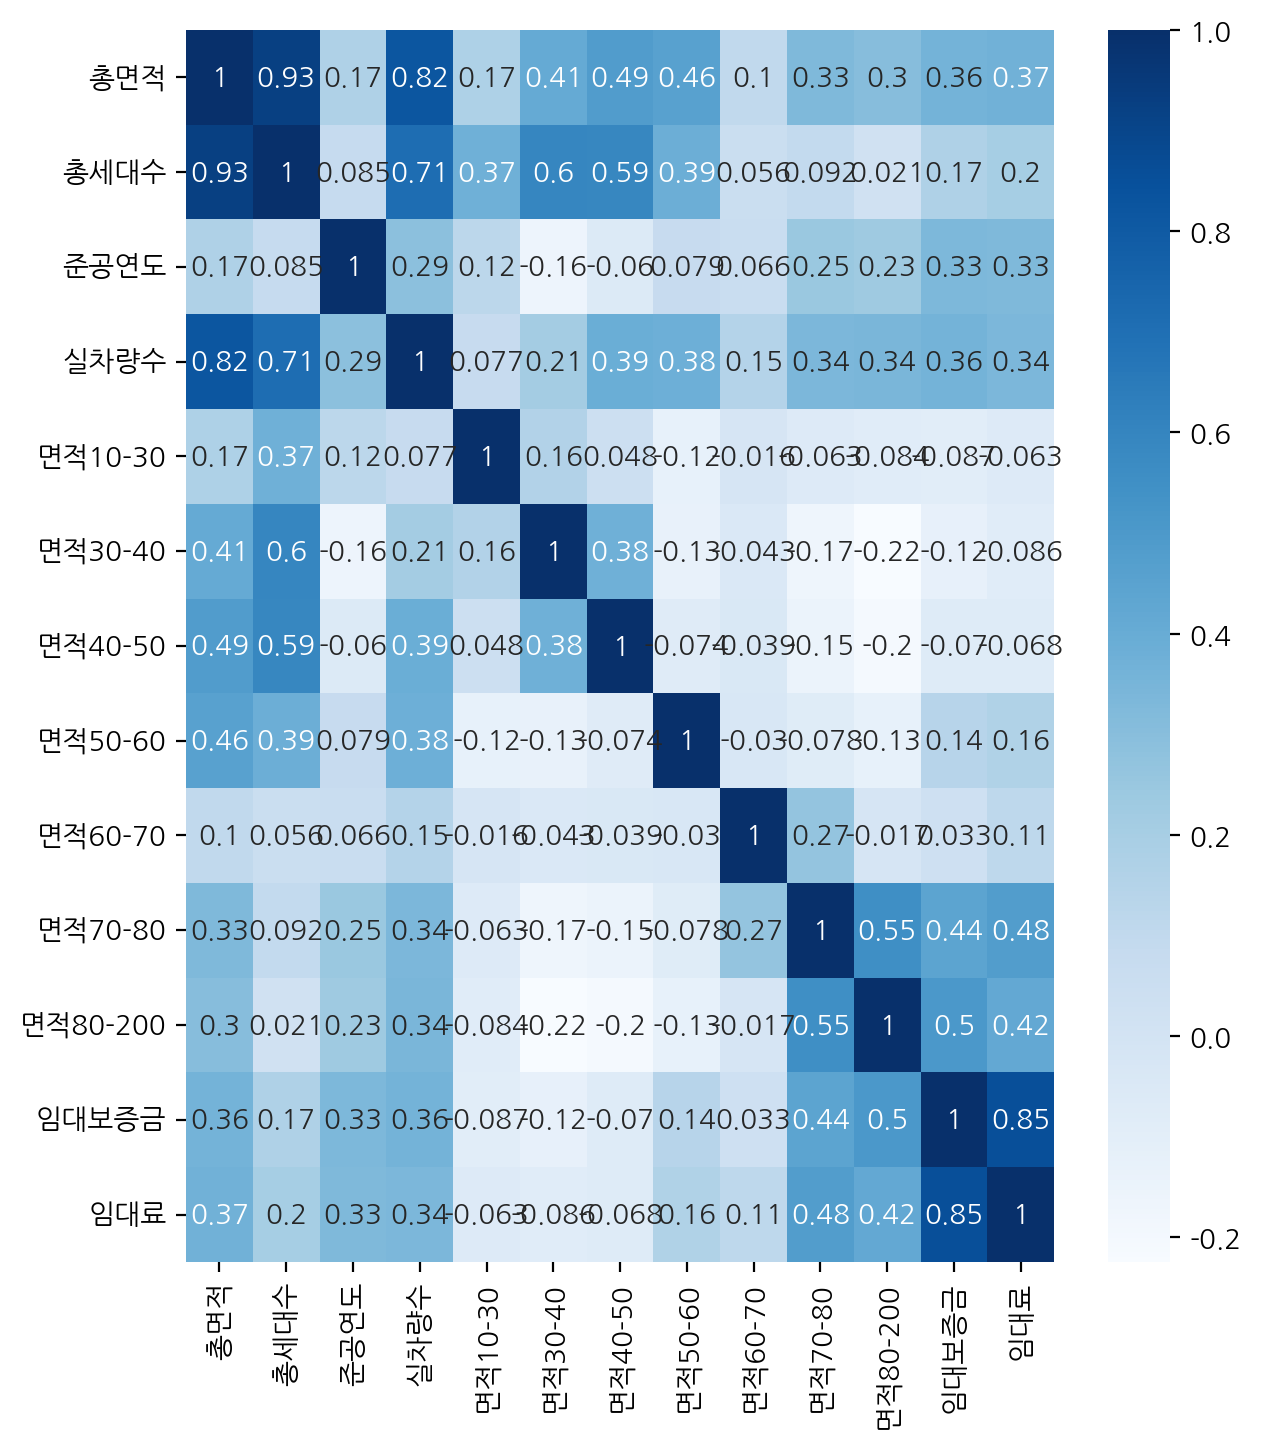

In [57]:
plt.figure(figsize=(7,8))
corr_matrix = apart.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

### (2) 숫자형 변수 → 실차량수

- 상관계수가 높은 상위 3~5개 숫자형 변수와 실차량수 관계를 산점도를 시각화해 분석합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [59]:
# 함수 만들기
def continuous_num_target(col_name):
    plt.figure(figsize=(10,5))
    plt.scatter(apart[col_name],apart['실차량수'])
    plt.xlabel(col_name)
    plt.ylabel('실차량수')
    plt.show()

#### 1) 총면적

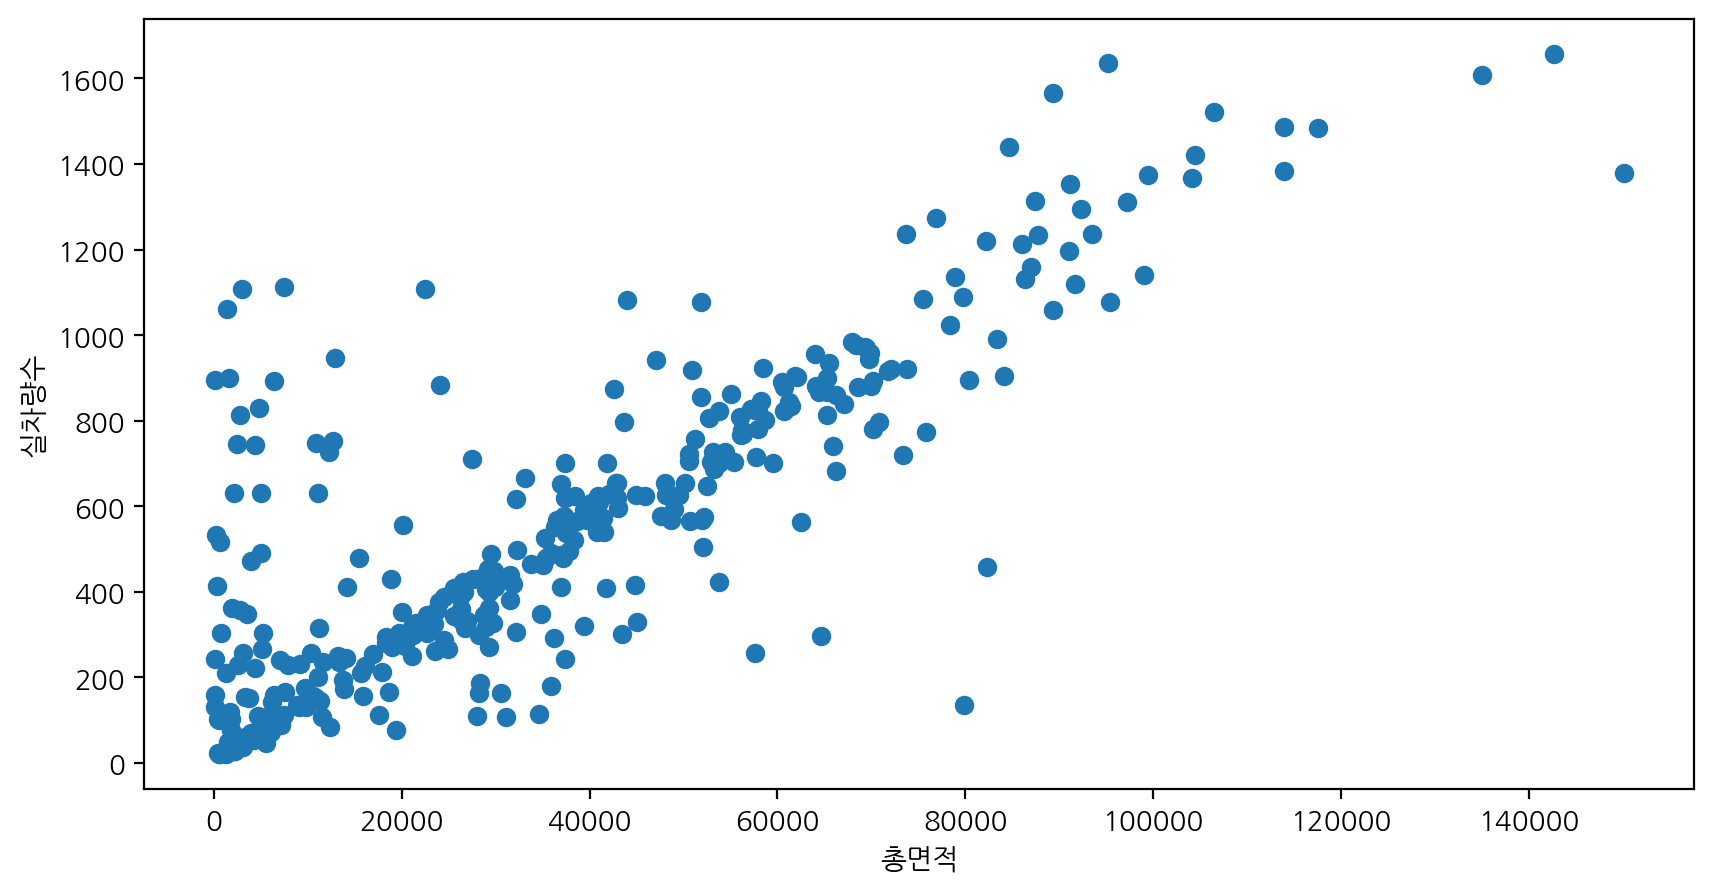

In [61]:
continuous_num_target('총면적')

#### 2) 총세대수

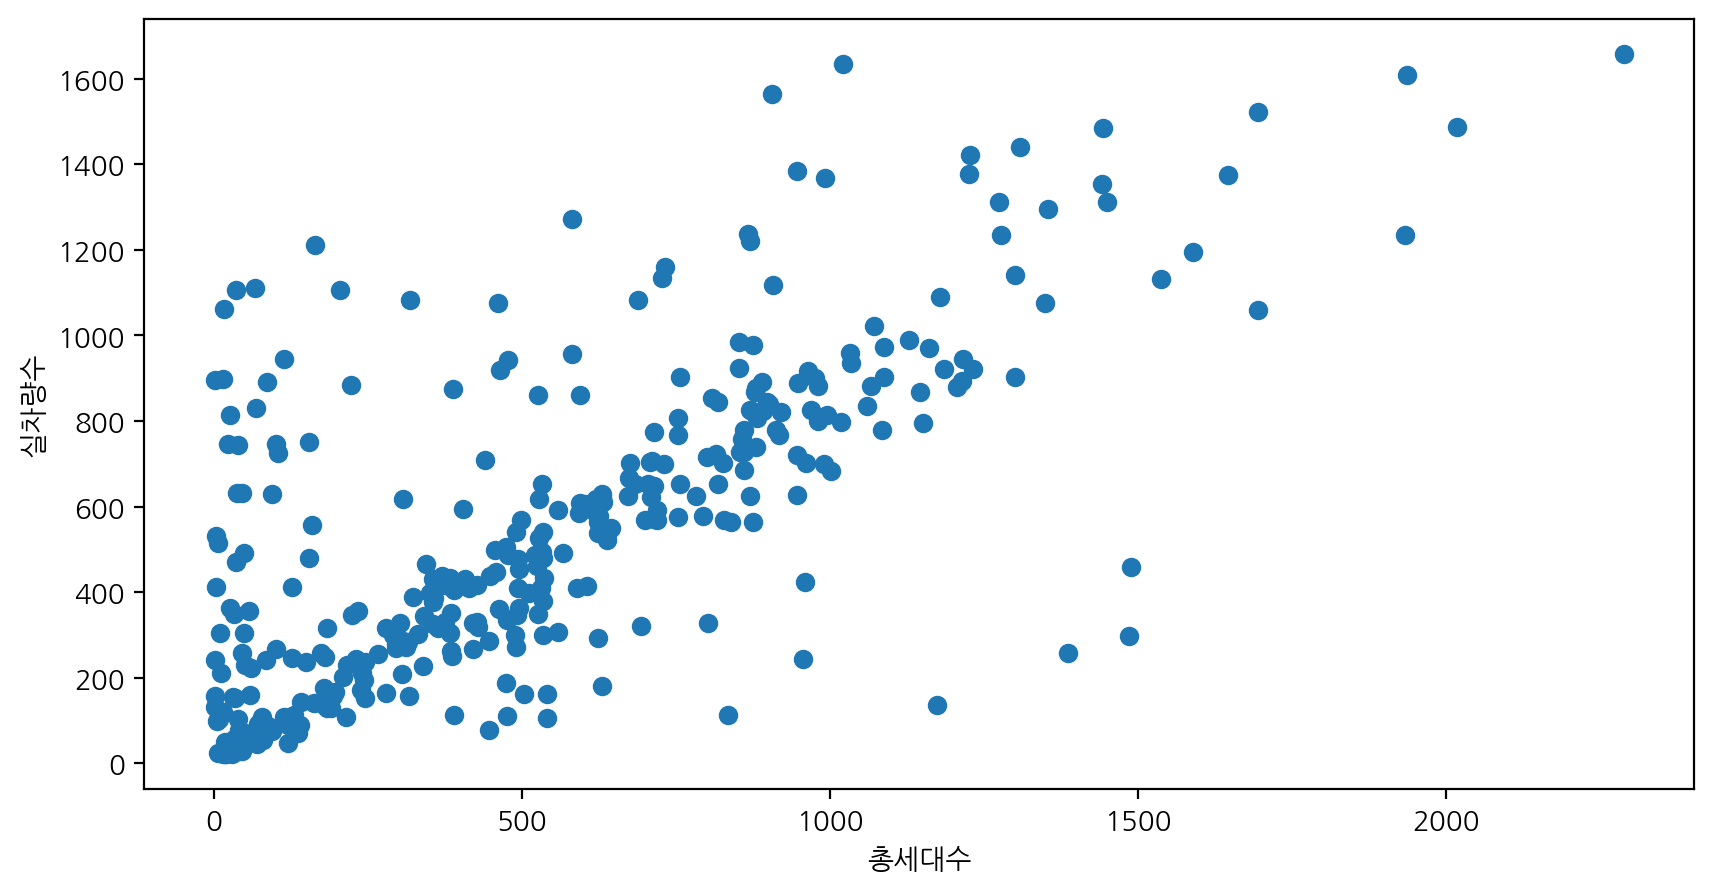

In [63]:
continuous_num_target('총세대수')

#### 3) 면적 40-50

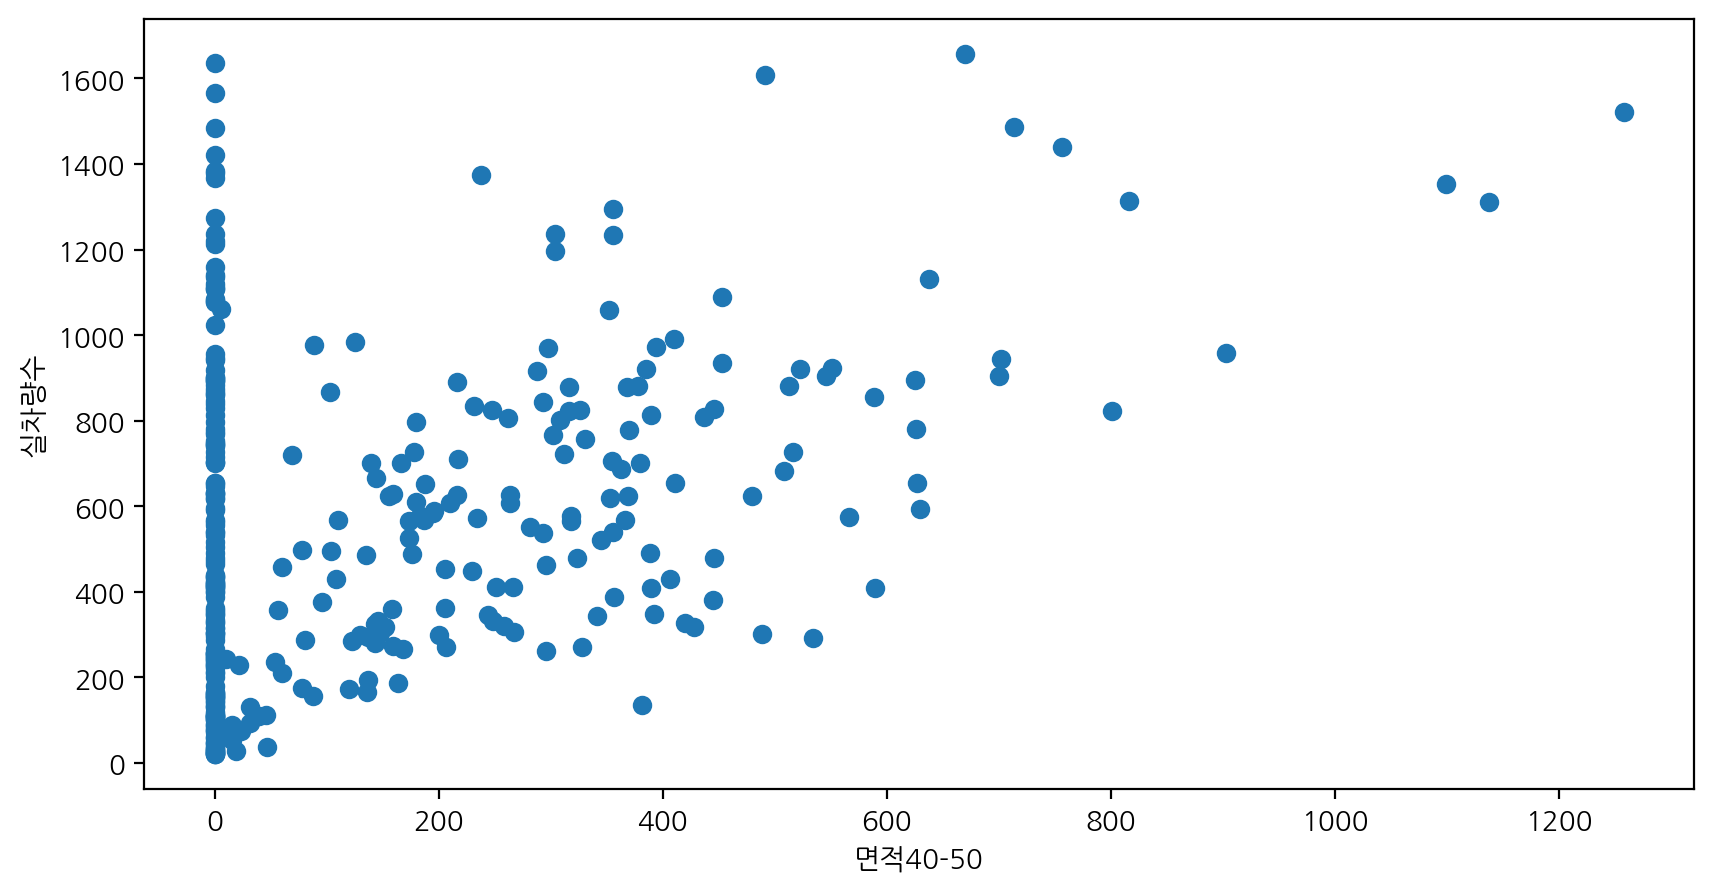

In [65]:
continuous_num_target('면적40-50')

#### 4) 면적 50-60

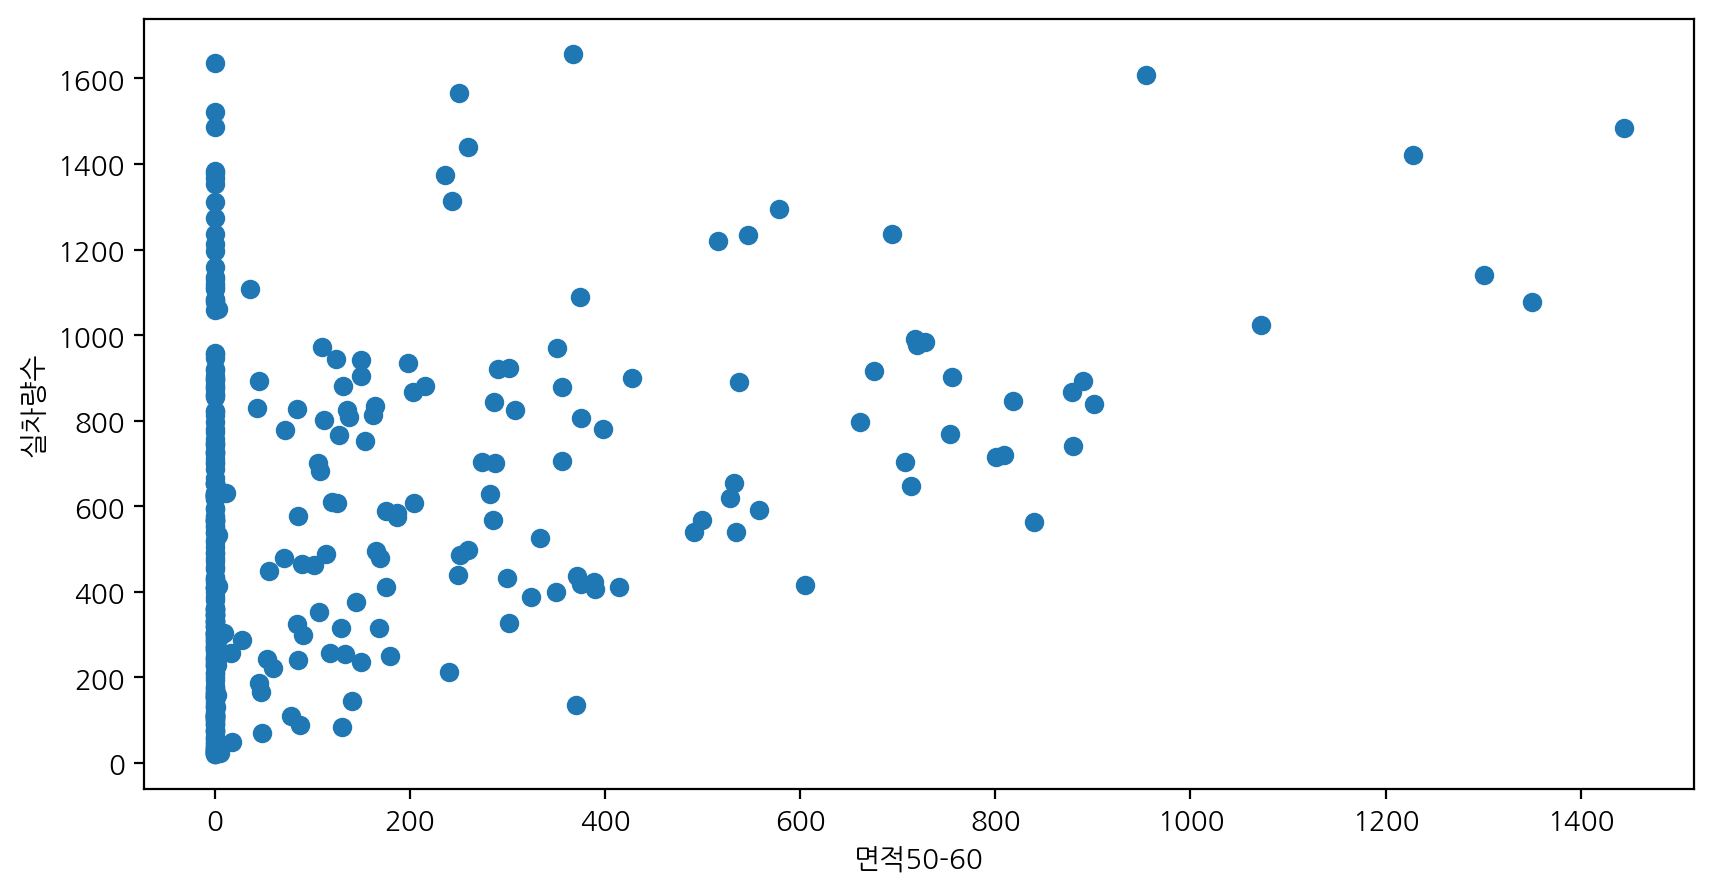

In [67]:
continuous_num_target('면적50-60')

#### 5) 임대보증금

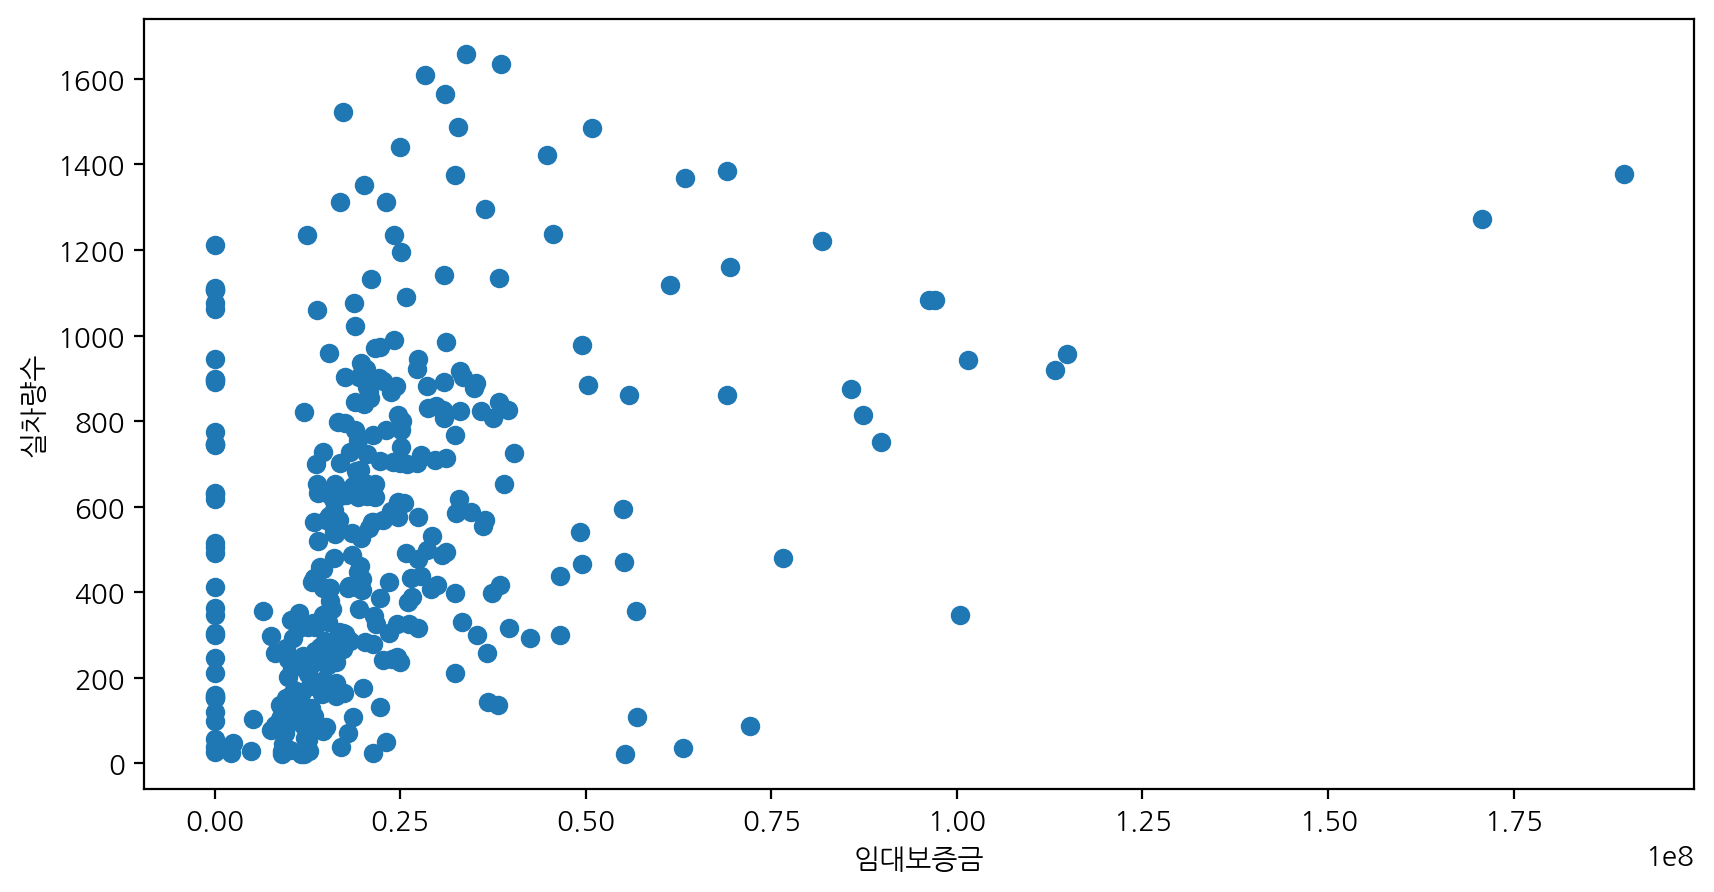

In [69]:
continuous_num_target('임대보증금')

- 총면적과 총 세대수는 실차량수와 높은 양의 상관관계를 가진다.
- 이를 통해 총 면적이 높아질수록 실차량수가 많아질것이라는 판단을 함

### (3) 범주형 변수 → 실차량수

- 범주형 변수 → 실차량수 관계를 분석합니다.
- 대상: '지역', '준공연도', '건물형태', '난방방식', '승강기설치여부'
- 범줏값 별 실차량수 평균을 막대그래프로 시각화해 분석합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [72]:
# 함수 만들기
def category_to_target(col_name):
    plt.figure(figsize=(10,5))
    sorted_apart = apart.sort_values('실차량수', ascending=False)
    plt.bar(sorted_apart[col_name], sorted_apart['실차량수'])
    plt.xlabel(col_name)
    plt.ylabel('실차량수')
    plt.xticks(rotation=90)  # x축 라벨이 겹치지 않도록 회전
    plt.show()

#### 1) 지역

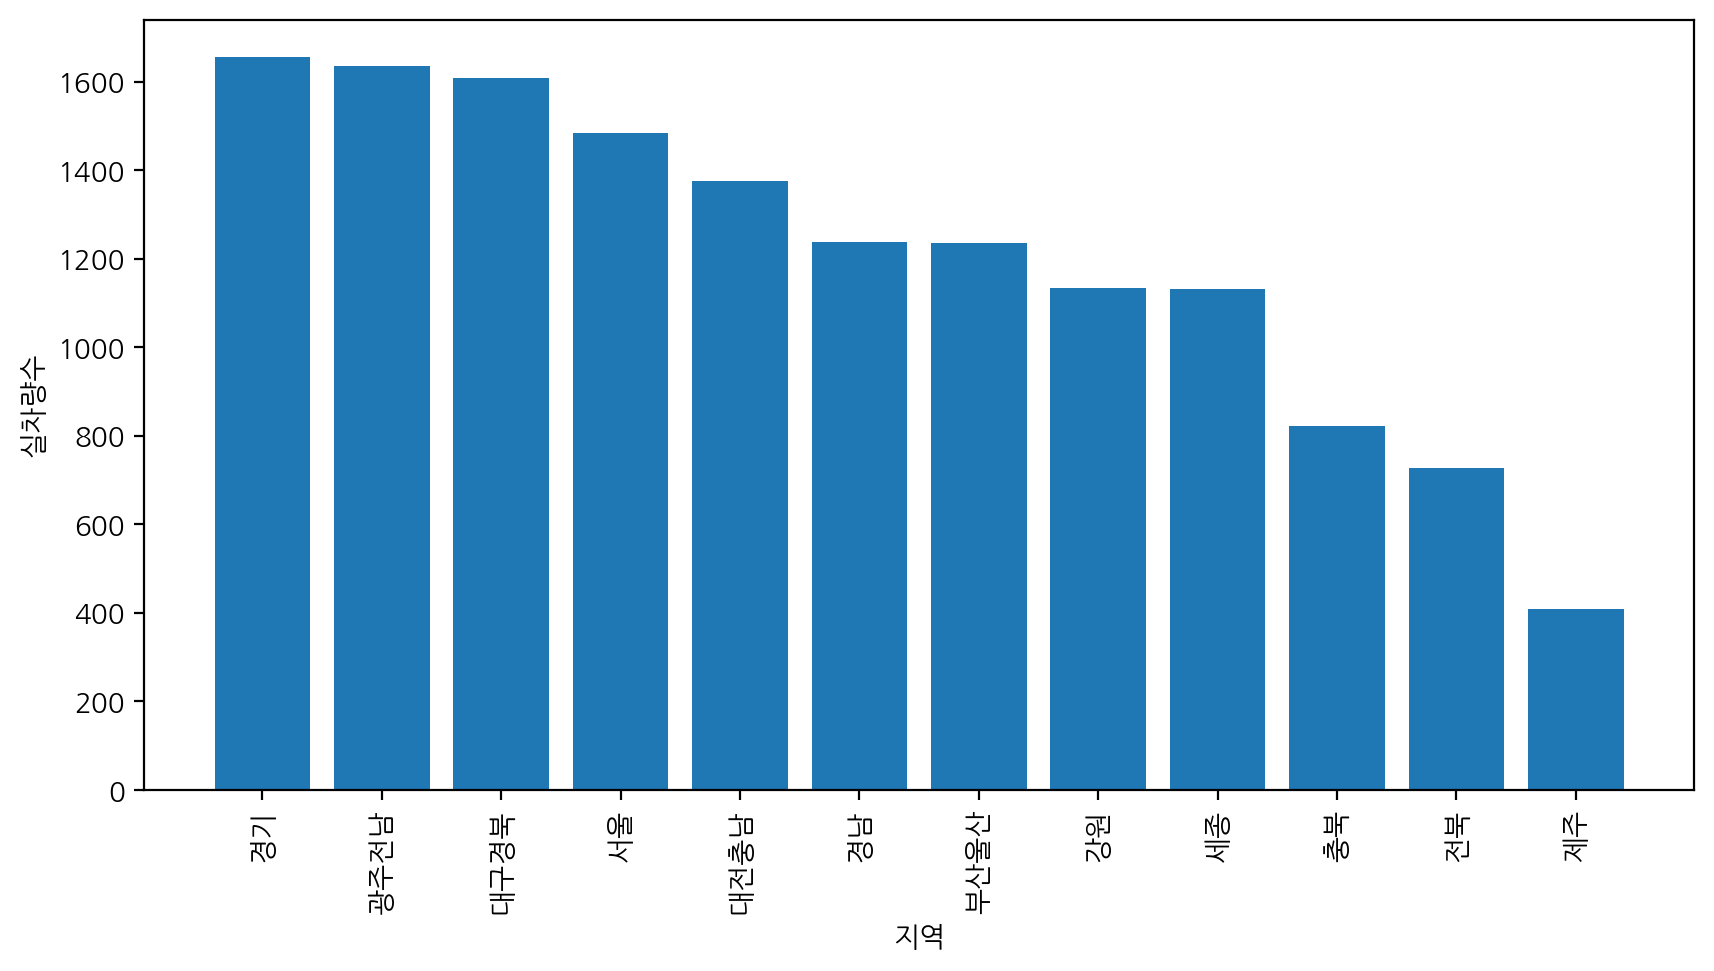

In [74]:
category_to_target('지역')

#### 2) 준공연도

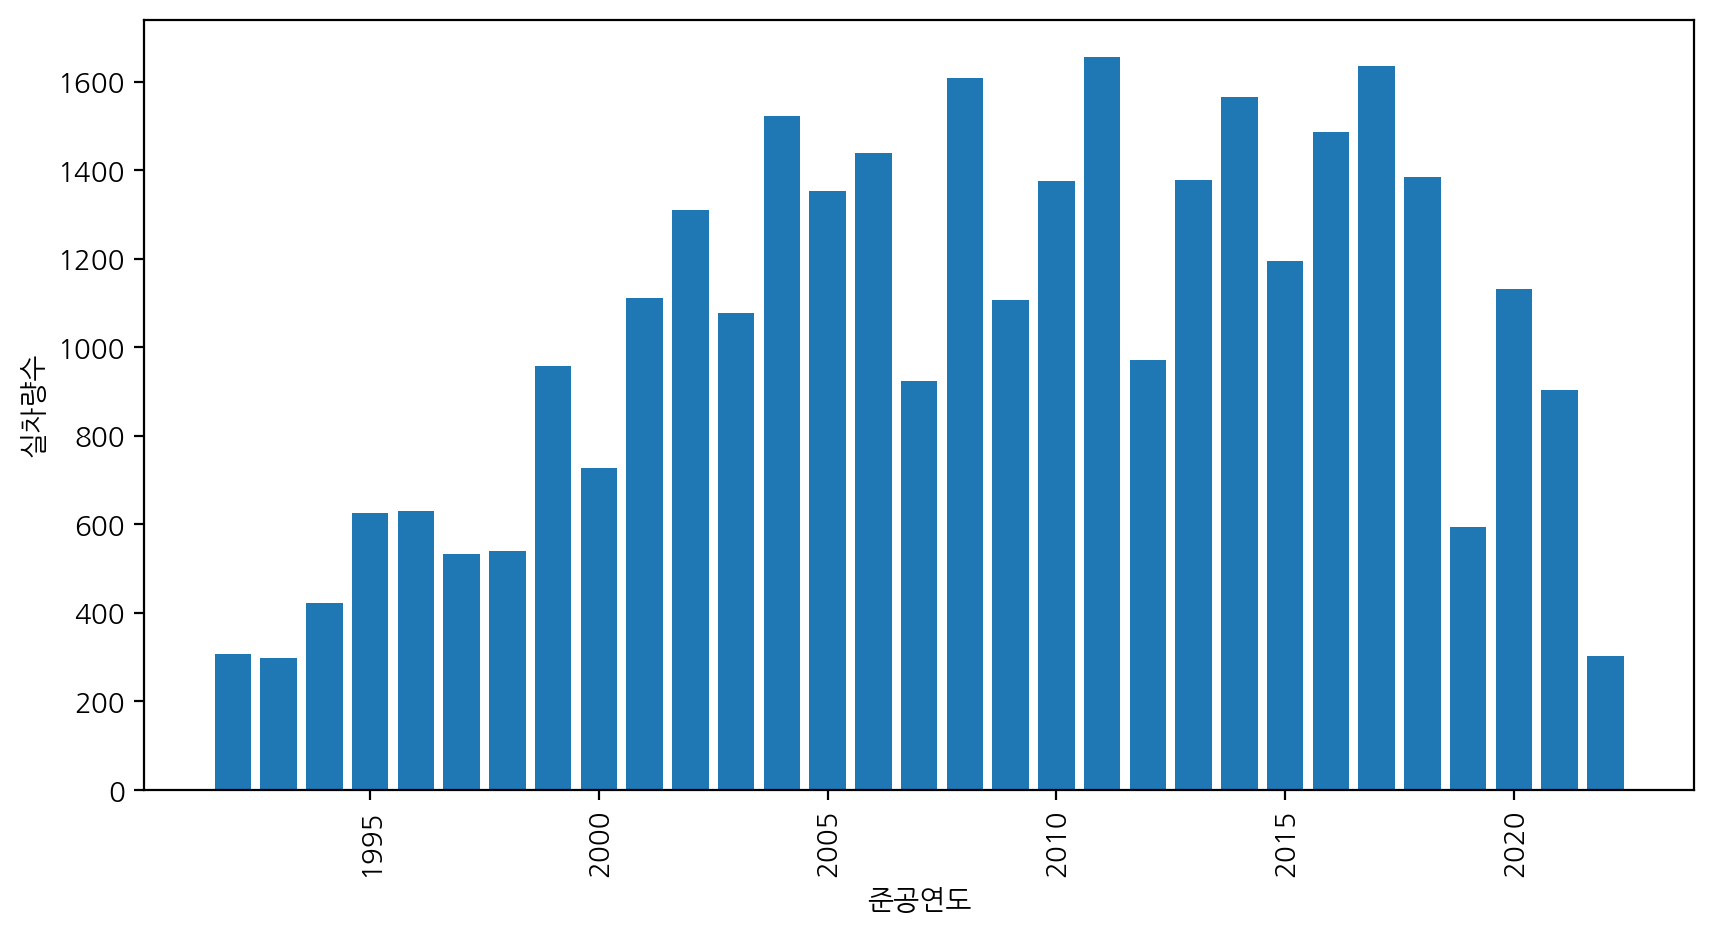

In [76]:
category_to_target('준공연도')

- 준공연동는 들쭉날쭉한것을 보니 예측하는데 있어서 중요 변수가 아닐것이라고 예측

#### 3) 건물형태

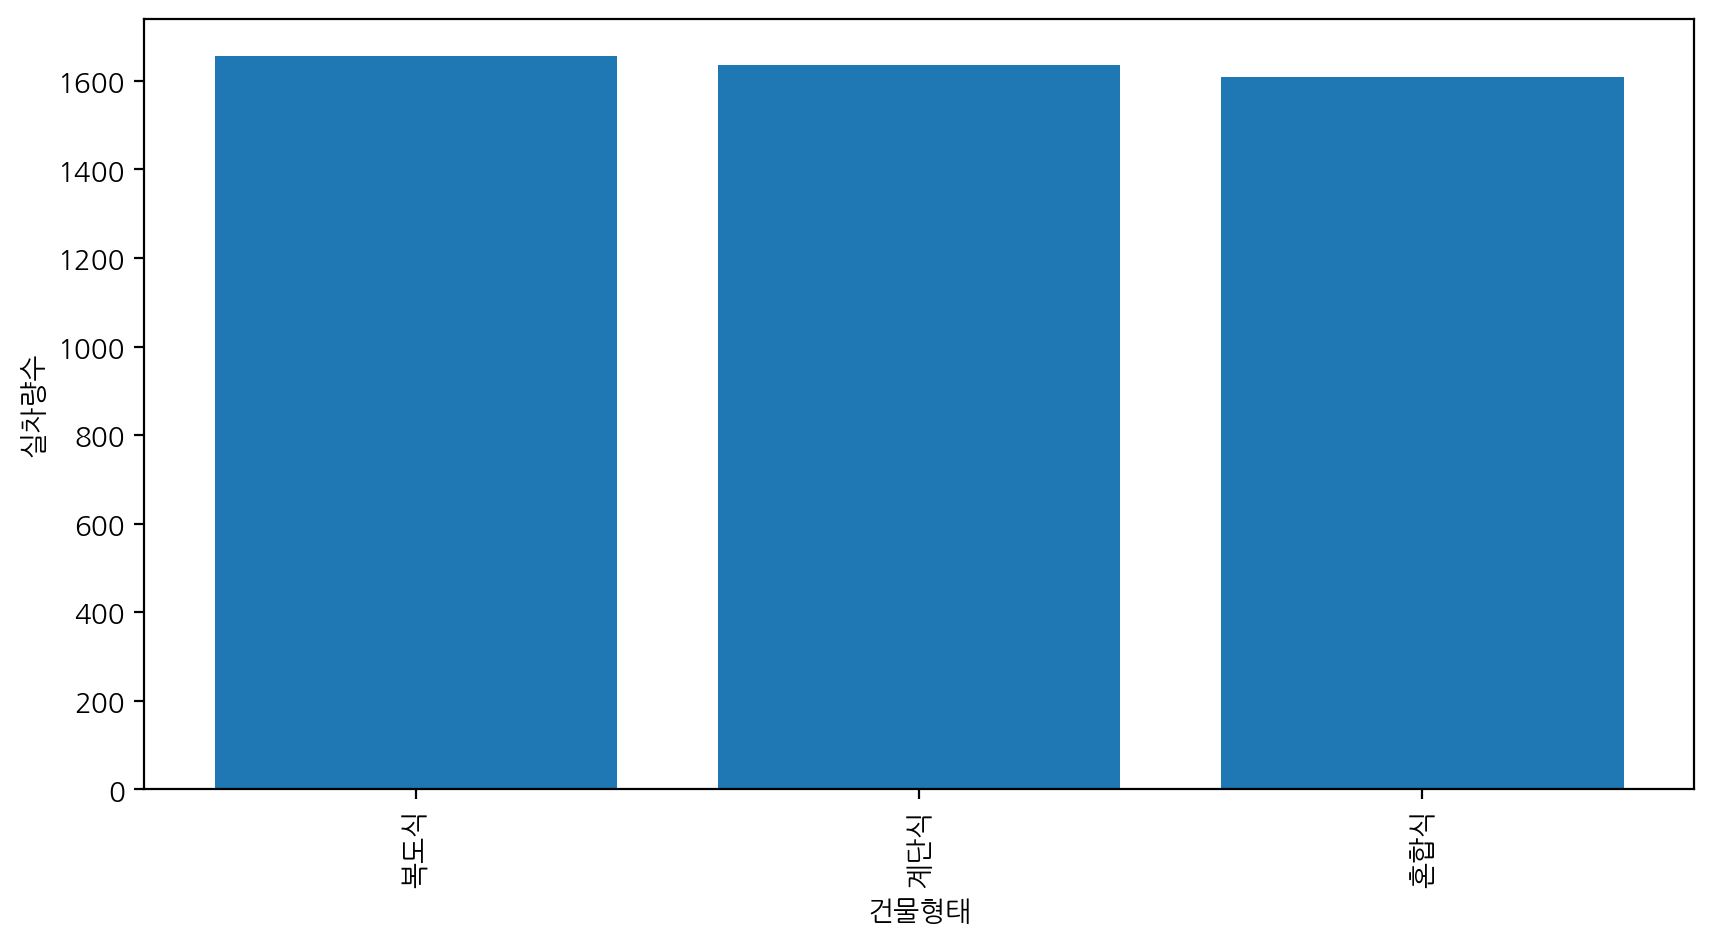

In [79]:
category_to_target('건물형태')

- 건물 형태는 고르게 분포되어 있기 때문에 모델이 예측하는데 있어서 중요요인이 될것이라고 판단

#### 4) 난방방식

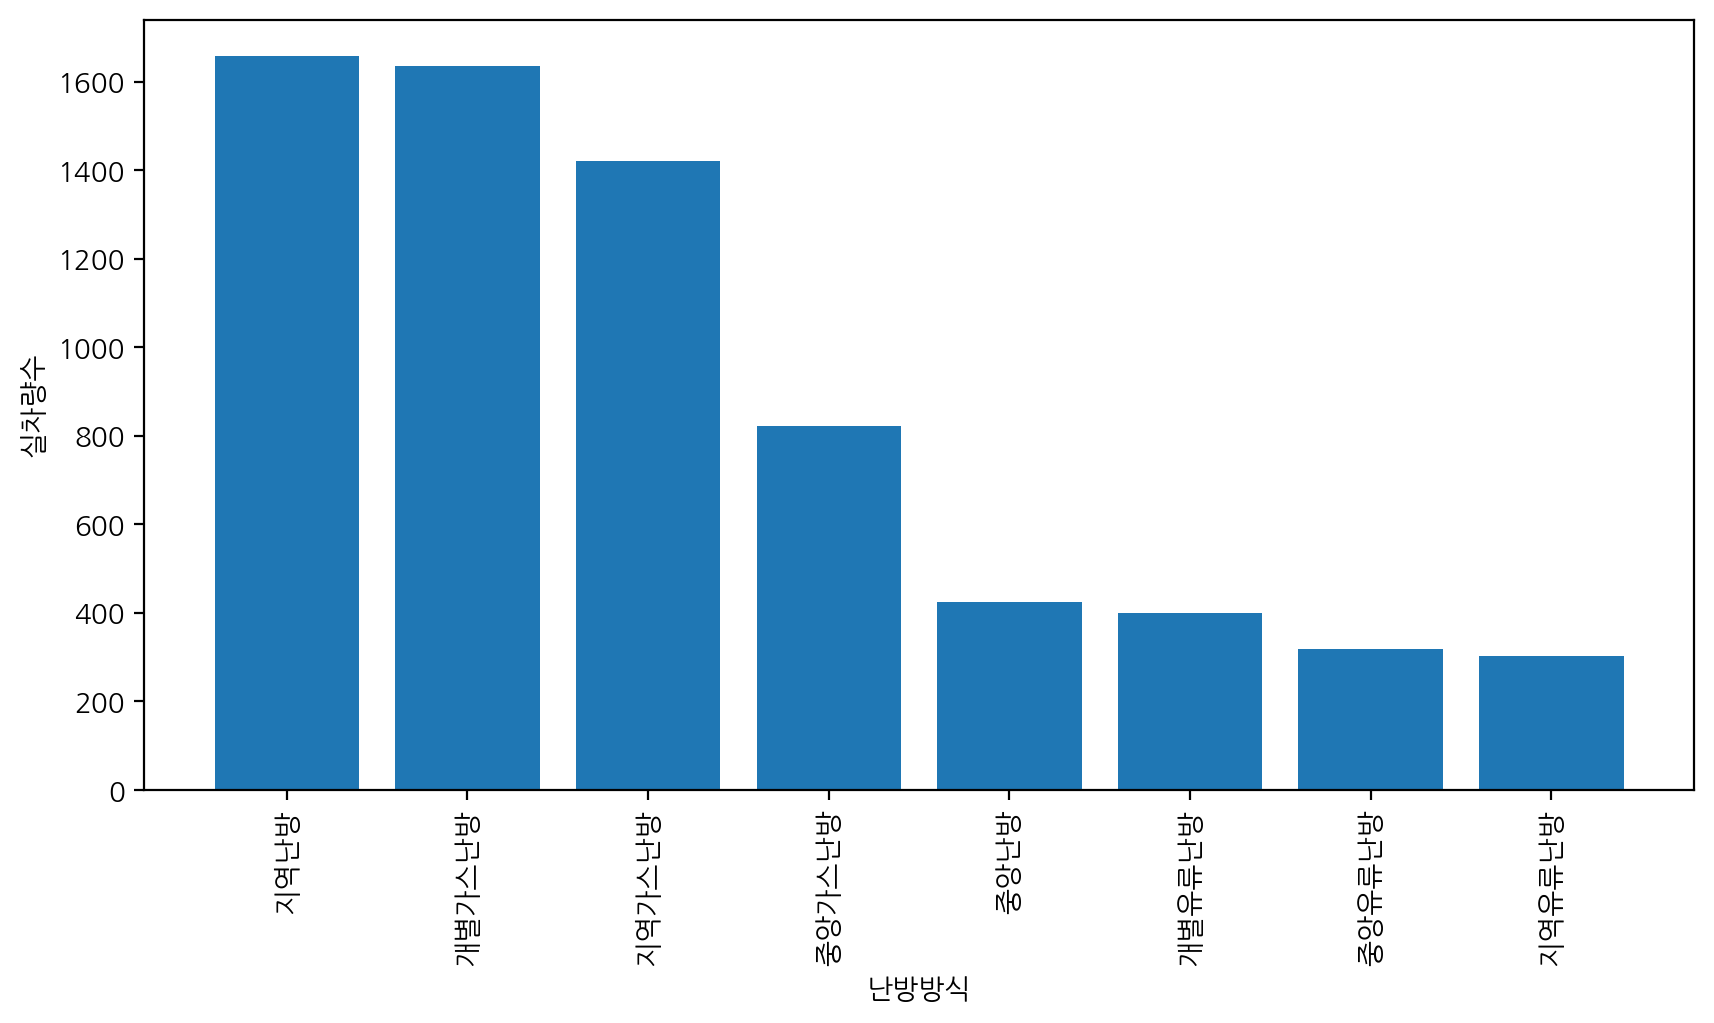

In [82]:
category_to_target('난방방식')

#### 5) 승강기설치여부

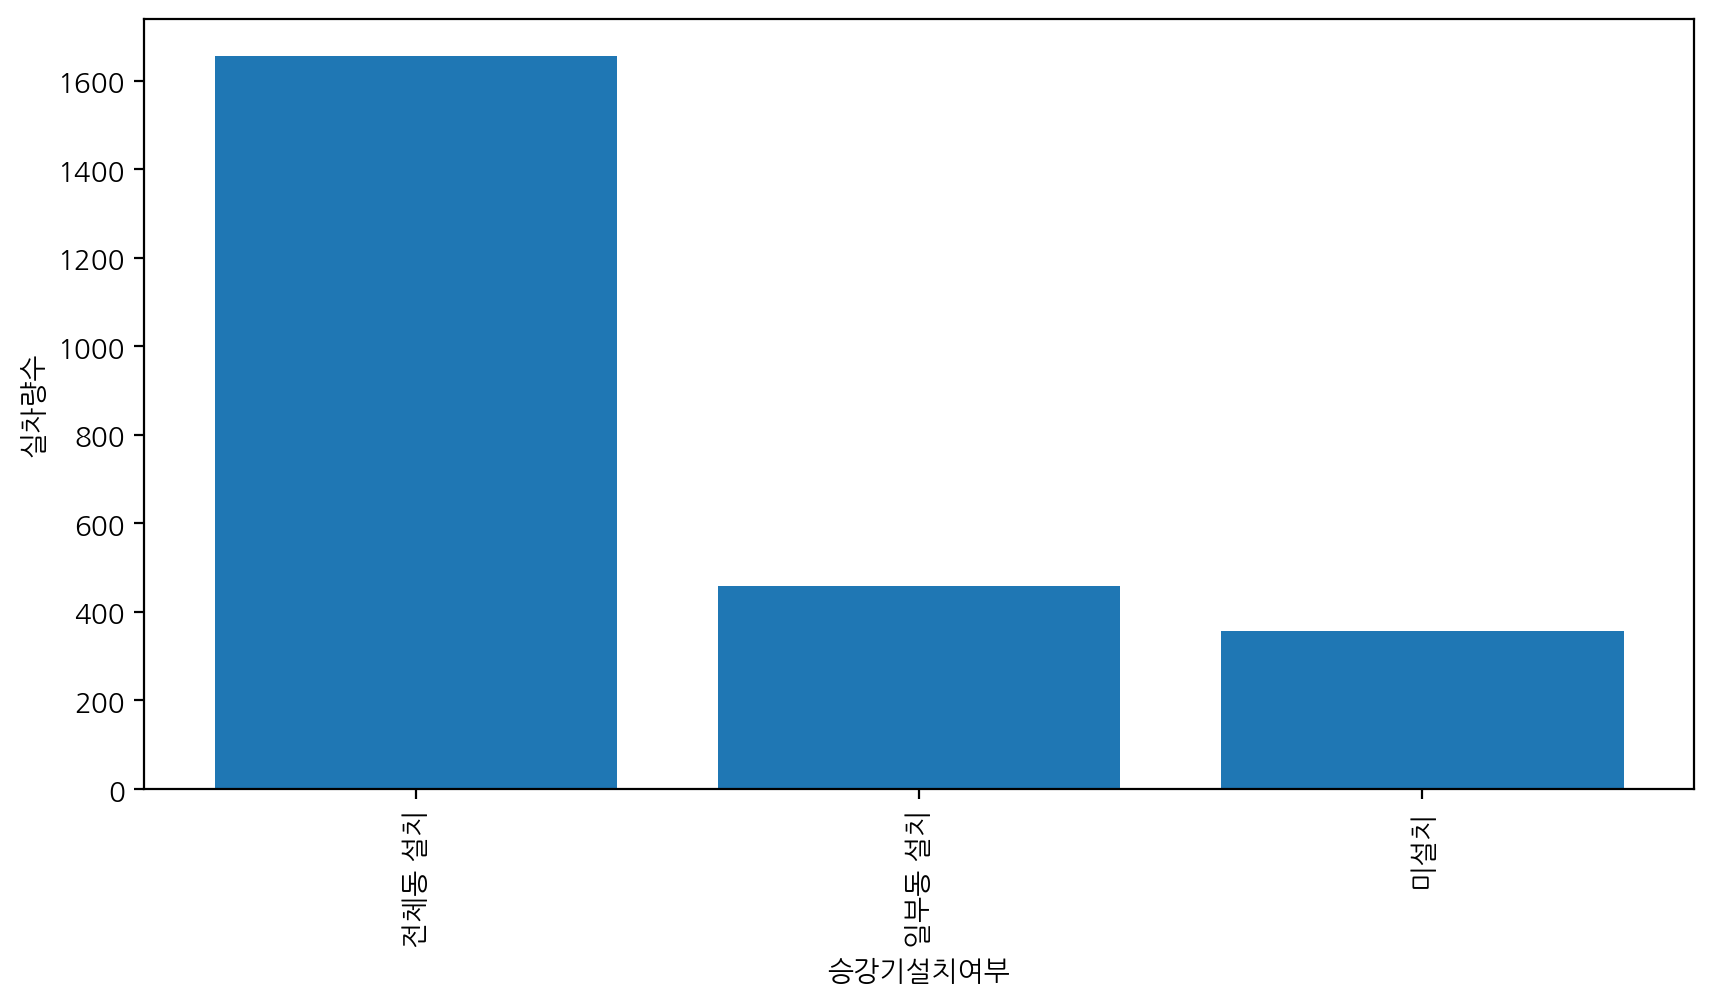

In [84]:
category_to_target('승강기설치여부')

## 5. 추가 전처리

- '난방방식', '승강기설치여부' 두 변수에 대해서 적은 수의 범주로 묶는 작업을 진행합니다.
- '단지코드'는 개별적인 값이므로 예측과 관련이 없으니 제거합니다.
- '지역' 변수는 지역별 특성을 고려하기에는 너무 세분화 되어 있고, 특징으로 통합하기 어려우므로 제거합니다.

### (1) 난방방식

- '난방방식' 변수의 값을 다음과 같이 변경하여 세 개의 범줏값만 갖게 합니다.
    - 개별가스난방 → 개별
    - 개별유류난방 → 개별
    - 지역난방 → 지역
    - 지역가스난방 → 지역
    - 지역유류난방 → 지역
    - 중앙가스난방 → 중앙
    - 중앙난방 → 중앙
    - 중앙유류난방 → 중앙

In [87]:
apart=apart.replace('개별가스난방','개별')
apart=apart.replace('개별유류난방','개별')
apart=apart.replace('지역난방','지역')
apart=apart.replace('지역가스난방','지역')
apart=apart.replace('지역유류난방','지역')
apart=apart.replace('중앙가스난방','중앙')
apart=apart.replace('중앙난방','중앙')
apart=apart.replace('중앙유류난방','중앙')

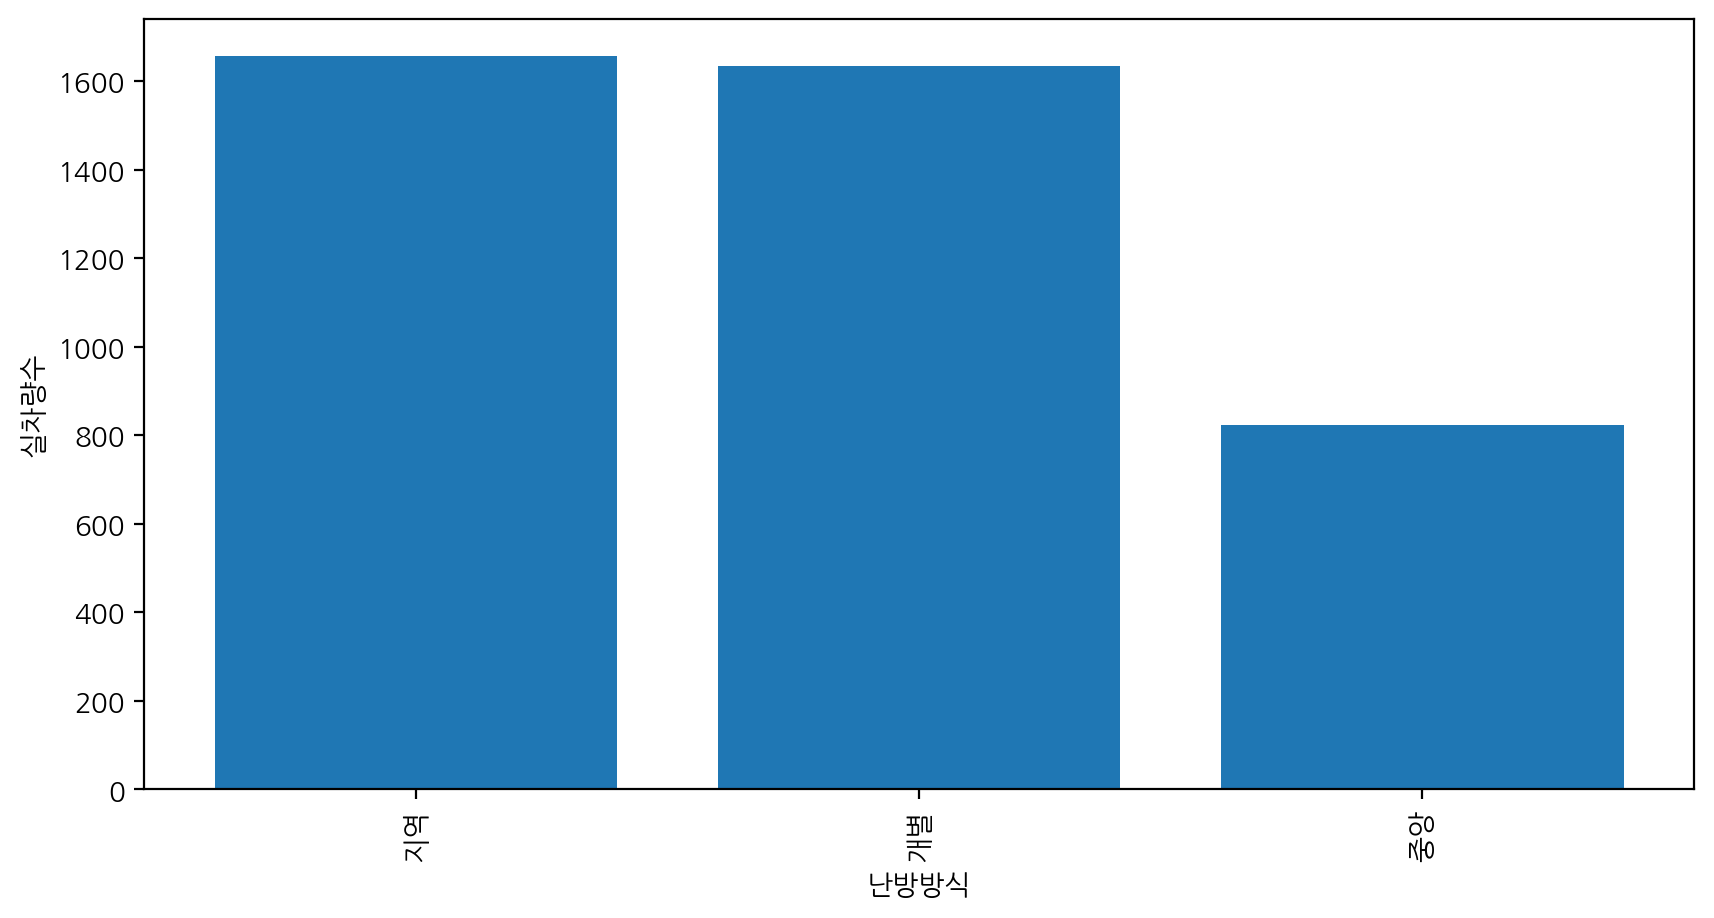

In [88]:
category_to_target('난방방식')

### (2) 승강기설치여부

- '승강기설치여부' 변수의 값을 다음과 같이 변경하여 0, 1 값을 갖게 합니다.
    - 전체동 설치 → 1
    - 일부동 설치 → 0
    - 미설치 → 0

In [90]:
apart=apart.replace('전체동 설치',1)
apart=apart.replace('일부동 설치',0)
apart=apart.replace('미설치',0)

### (3) 단지코드, 지역 제거

- '단지코드', '지역' 변수를 제거합니다.

In [92]:
apart.drop(columns=['단지코드','지역'],inplace=True)

- 최종 데이터를 확인합니다.

In [94]:
apart.head()

,총면적,총세대수,준공연도,건물형태,난방방식,승강기설치여부,실차량수,면적10-30,면적30-40,면적40-50,면적50-60,면적60-70,면적70-80,면적80-200,임대보증금,임대료
0,6023.7683,78,2013,계단식,개별,1,109,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,1569.1668,35,2013,복도식,개별,1,35,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,7180.1396,88,2013,계단식,개별,1,88,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,47058.9273,477,2014,복도식,지역,1,943,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,543.0268,15,2013,복도식,개별,1,21,15,0,0,0,0,0,0,5.522750e+07,340148.333333


## 6. 데이터 셋 저장

- joblib.dump() 함수를 사용하여 최종 데이터 셋을 파일로 저장합니다.
- 파일 이름은 base_data2.pkl로 합니다.

In [96]:
# 파일로 저장
joblib.dump(apart, path+'base_data2.pkl')

['base_data2.pkl']

In [97]:
apart2=apart

In [98]:
def replace_outliers(data, col_name):
    # IQR 기반 이상치 탐지
    Q1 = data[col_name].quantile(0.25)
    Q3 = data[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 이상치를 중앙값으로 대체
    replacement_value = data[col_name].median()
    data[col_name] = np.where((data[col_name] < lower_bound) | (data[col_name] > upper_bound), replacement_value, data[col_name])

    return data

In [99]:
replace_outliers(apart2,'총세대수')
replace_outliers(apart2,'총면적')
replace_outliers(apart2,'임대료')
replace_outliers(apart2,'임대보증금')

,총면적,총세대수,준공연도,건물형태,난방방식,승강기설치여부,실차량수,면적10-30,면적30-40,면적40-50,면적50-60,면적60-70,면적70-80,면적80-200,임대보증금,임대료
0,6023.7683,78.0,2013,계단식,개별,1,109,0,0,0,78,0,0,0,19308500.0,172000.000000
1,1569.1668,35.0,2013,복도식,개별,1,35,35,0,0,0,0,0,0,19308500.0,172000.000000
2,7180.1396,88.0,2013,계단식,개별,1,88,0,0,0,88,0,0,0,19308500.0,172000.000000
3,47058.9273,477.0,2014,복도식,지역,1,943,0,0,0,150,0,216,111,19308500.0,172000.000000
4,543.0268,15.0,2013,복도식,개별,1,21,15,0,0,0,0,0,0,19308500.0,340148.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,5143.4140,140.0,2017,복도식,개별,1,90,140,0,0,0,0,0,0,11886000.0,93000.000000
341,57616.8100,1386.0,1993,복도식,중앙,1,258,1071,298,0,17,0,0,0,8092875.0,111848.750000
342,7605.3580,196.0,2016,복도식,개별,1,166,196,0,0,0,0,0,0,11802500.0,94055.000000
343,3284.9760,80.0,2018,복도식,지역,1,60,80,0,0,0,0,0,0,12117000.0,108000.000000


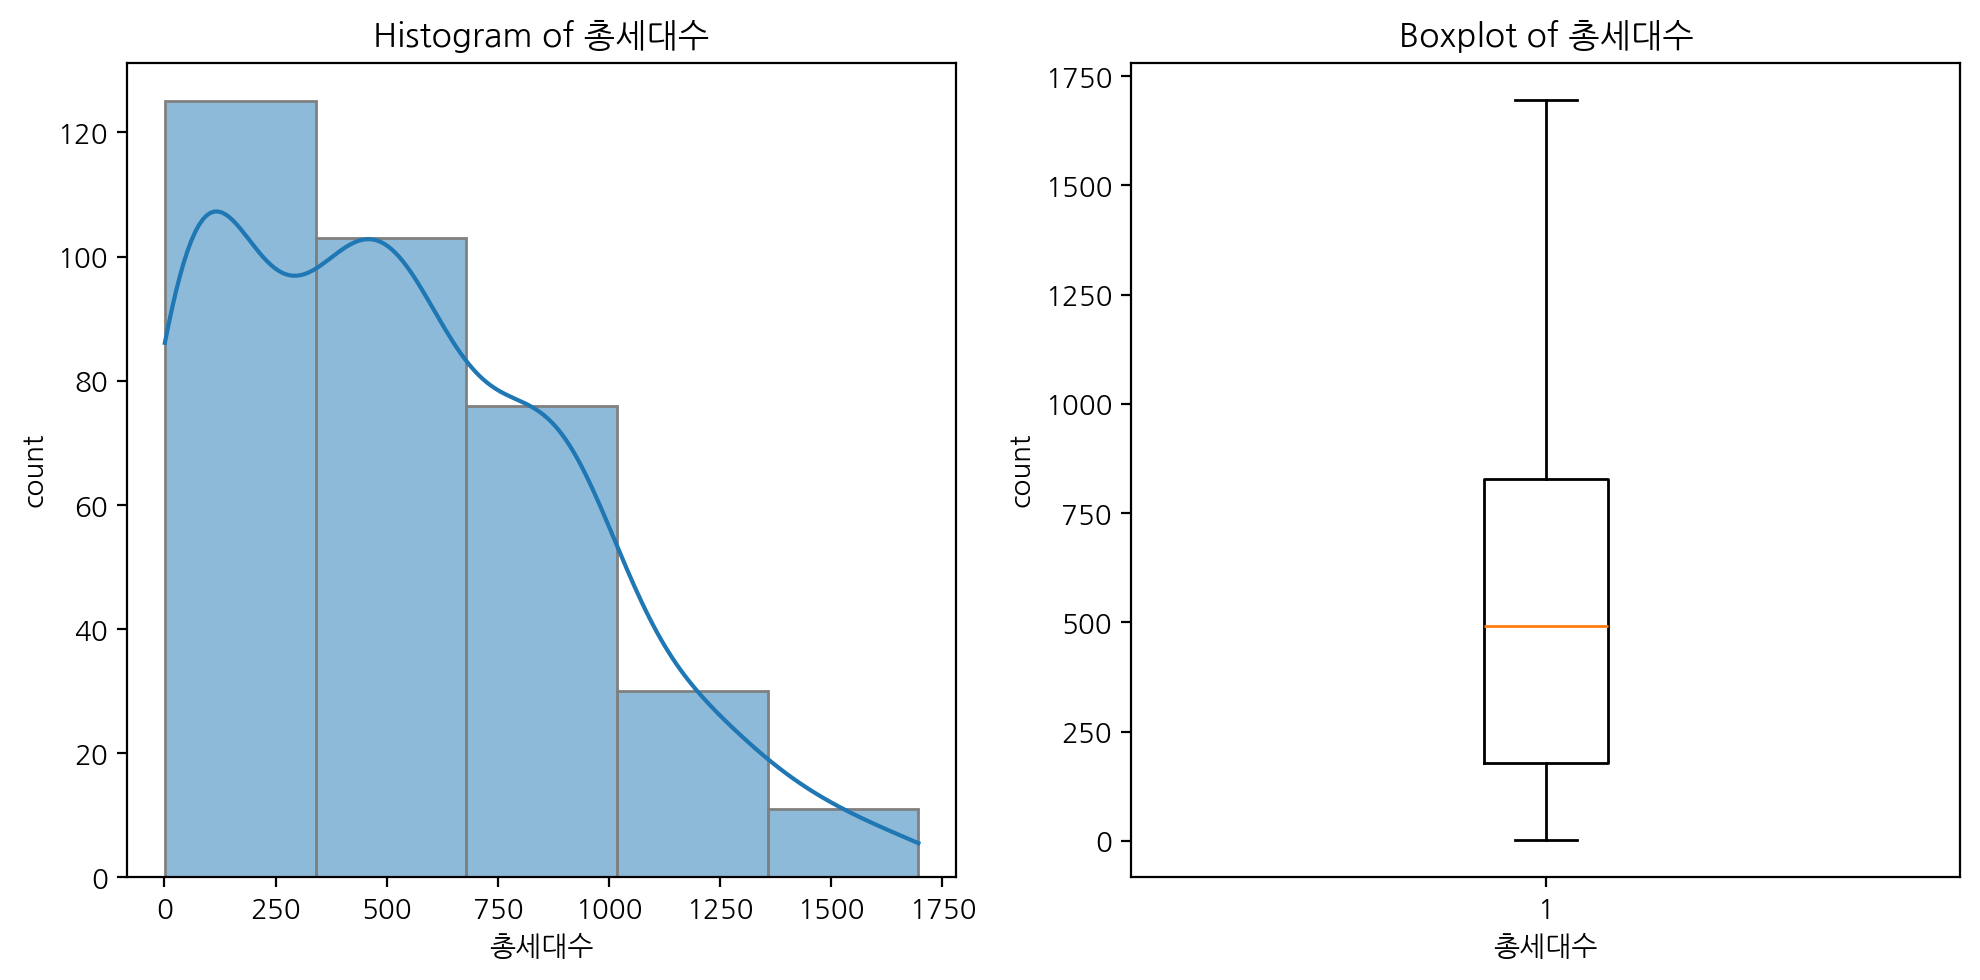

In [100]:
continuous(apart2,'총세대수')

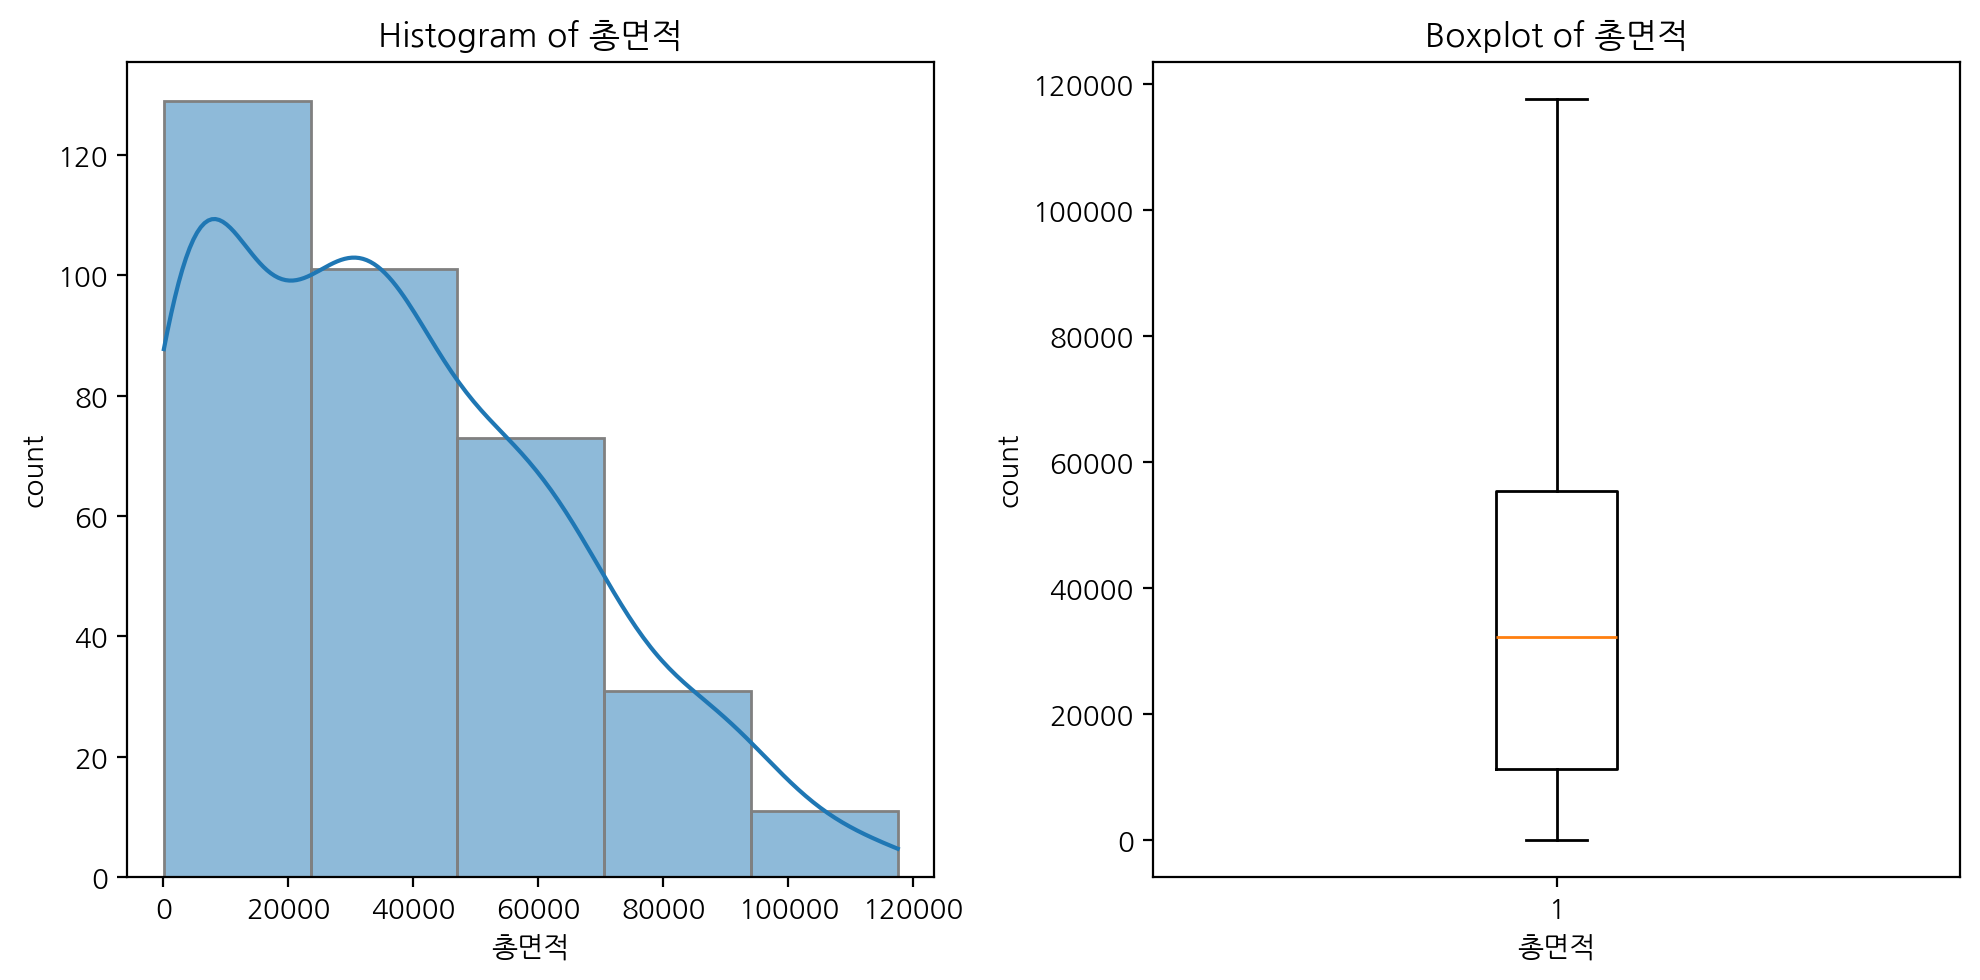

In [101]:
continuous(apart2,'총면적')

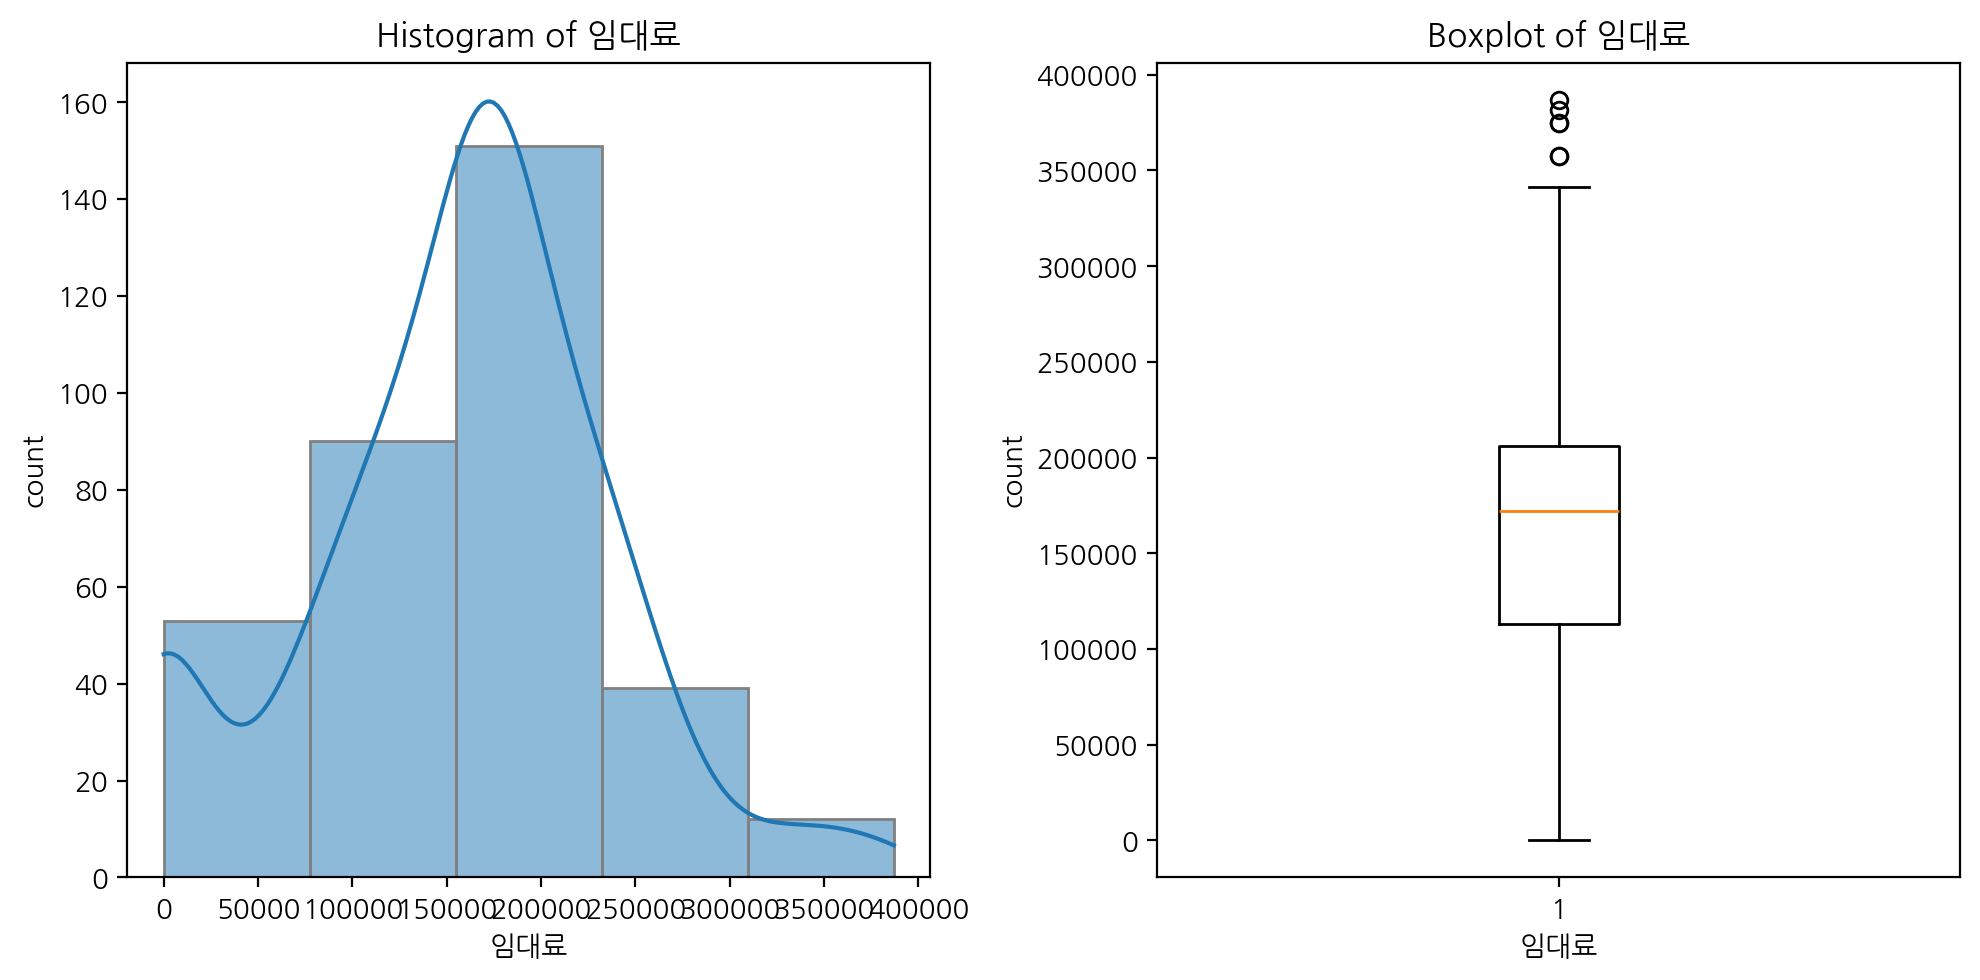

In [102]:
continuous(apart2,'임대료')

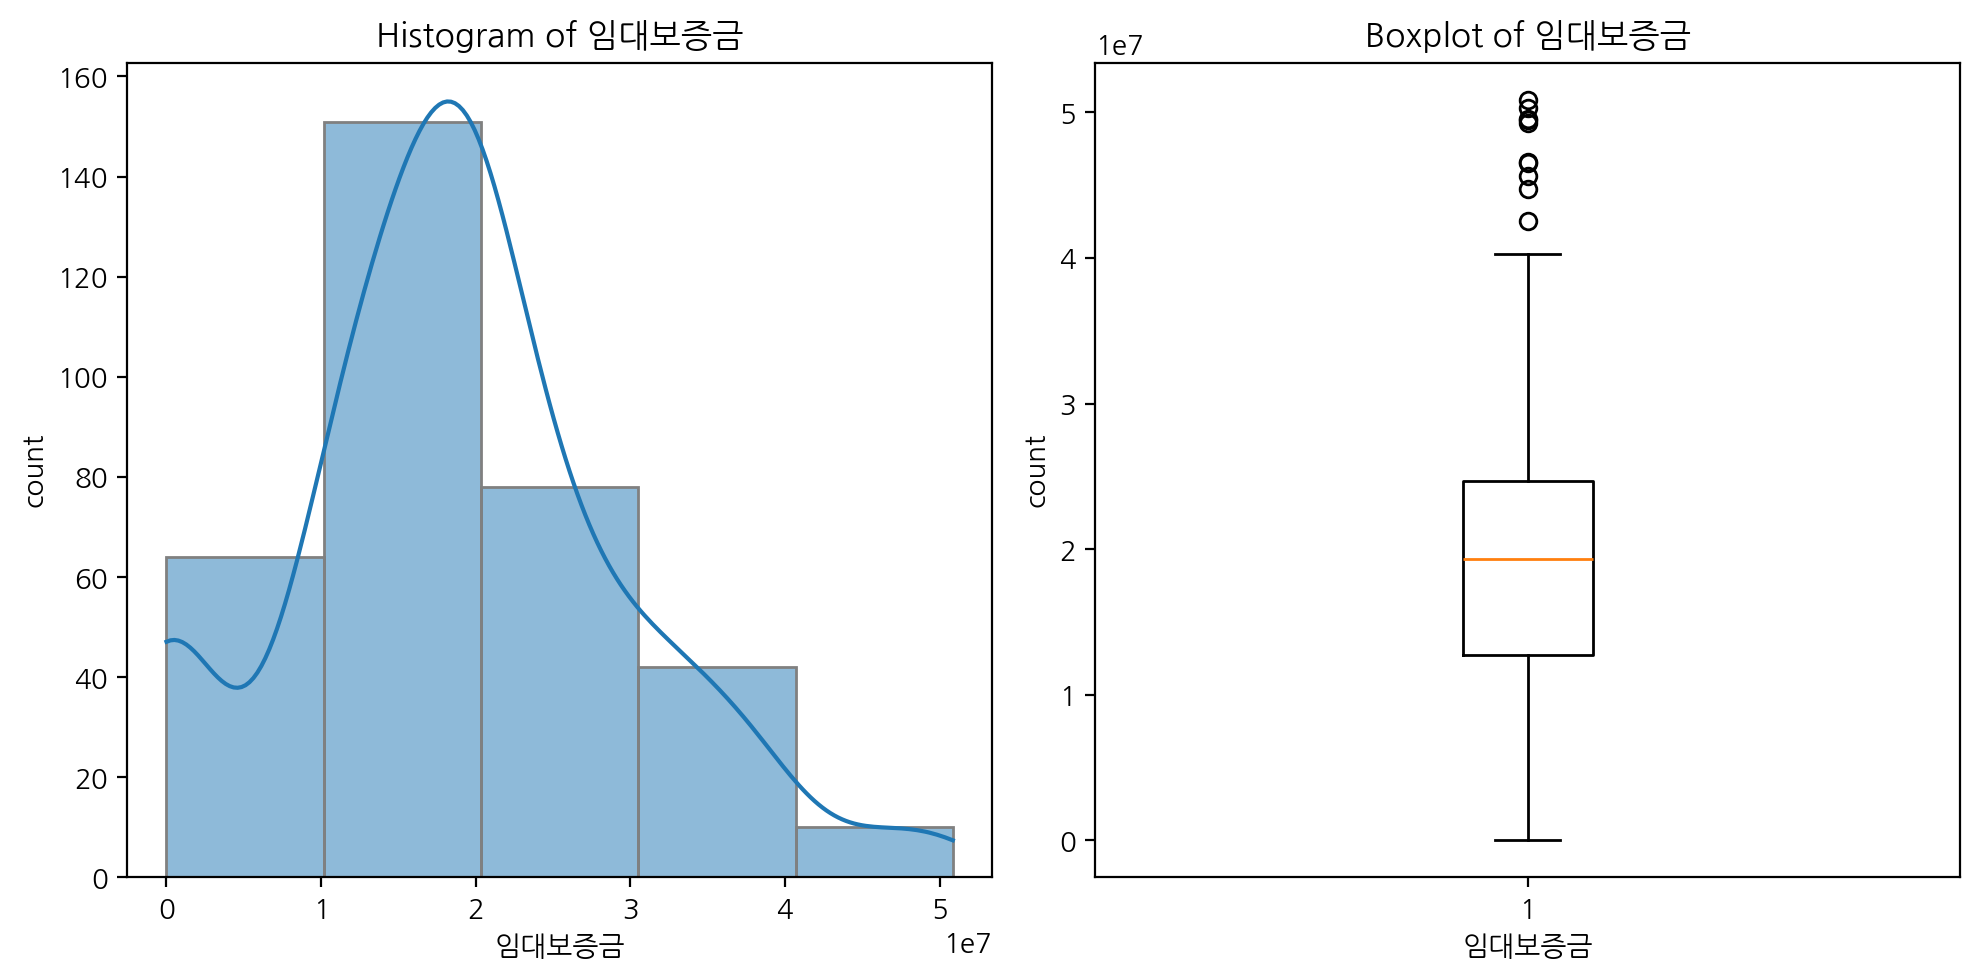

In [103]:
continuous(apart2,'임대보증금')

In [104]:
def replace_outliers2(data, col_name):
    # IQR 기반 이상치 탐지
    Q1 = data[col_name].quantile(0.25)
    Q3 = data[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 이상치를 평균값으로 대체
    replacement_value = data[col_name].median()
    data[col_name] = np.where((data[col_name] < lower_bound) | (data[col_name] > upper_bound), replacement_value, data[col_name])

    return data

In [105]:
apart3=apart

In [106]:
replace_outliers2(apart3,'총세대수')
replace_outliers2(apart3,'총면적')
replace_outliers2(apart3,'임대료')
replace_outliers2(apart3,'임대보증금')

,총면적,총세대수,준공연도,건물형태,난방방식,승강기설치여부,실차량수,면적10-30,면적30-40,면적40-50,면적50-60,면적60-70,면적70-80,면적80-200,임대보증금,임대료
0,6023.7683,78.0,2013,계단식,개별,1,109,0,0,0,78,0,0,0,19308500.0,172000.000000
1,1569.1668,35.0,2013,복도식,개별,1,35,35,0,0,0,0,0,0,19308500.0,172000.000000
2,7180.1396,88.0,2013,계단식,개별,1,88,0,0,0,88,0,0,0,19308500.0,172000.000000
3,47058.9273,477.0,2014,복도식,지역,1,943,0,0,0,150,0,216,111,19308500.0,172000.000000
4,543.0268,15.0,2013,복도식,개별,1,21,15,0,0,0,0,0,0,19308500.0,340148.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,5143.4140,140.0,2017,복도식,개별,1,90,140,0,0,0,0,0,0,11886000.0,93000.000000
341,57616.8100,1386.0,1993,복도식,중앙,1,258,1071,298,0,17,0,0,0,8092875.0,111848.750000
342,7605.3580,196.0,2016,복도식,개별,1,166,196,0,0,0,0,0,0,11802500.0,94055.000000
343,3284.9760,80.0,2018,복도식,지역,1,60,80,0,0,0,0,0,0,12117000.0,108000.000000


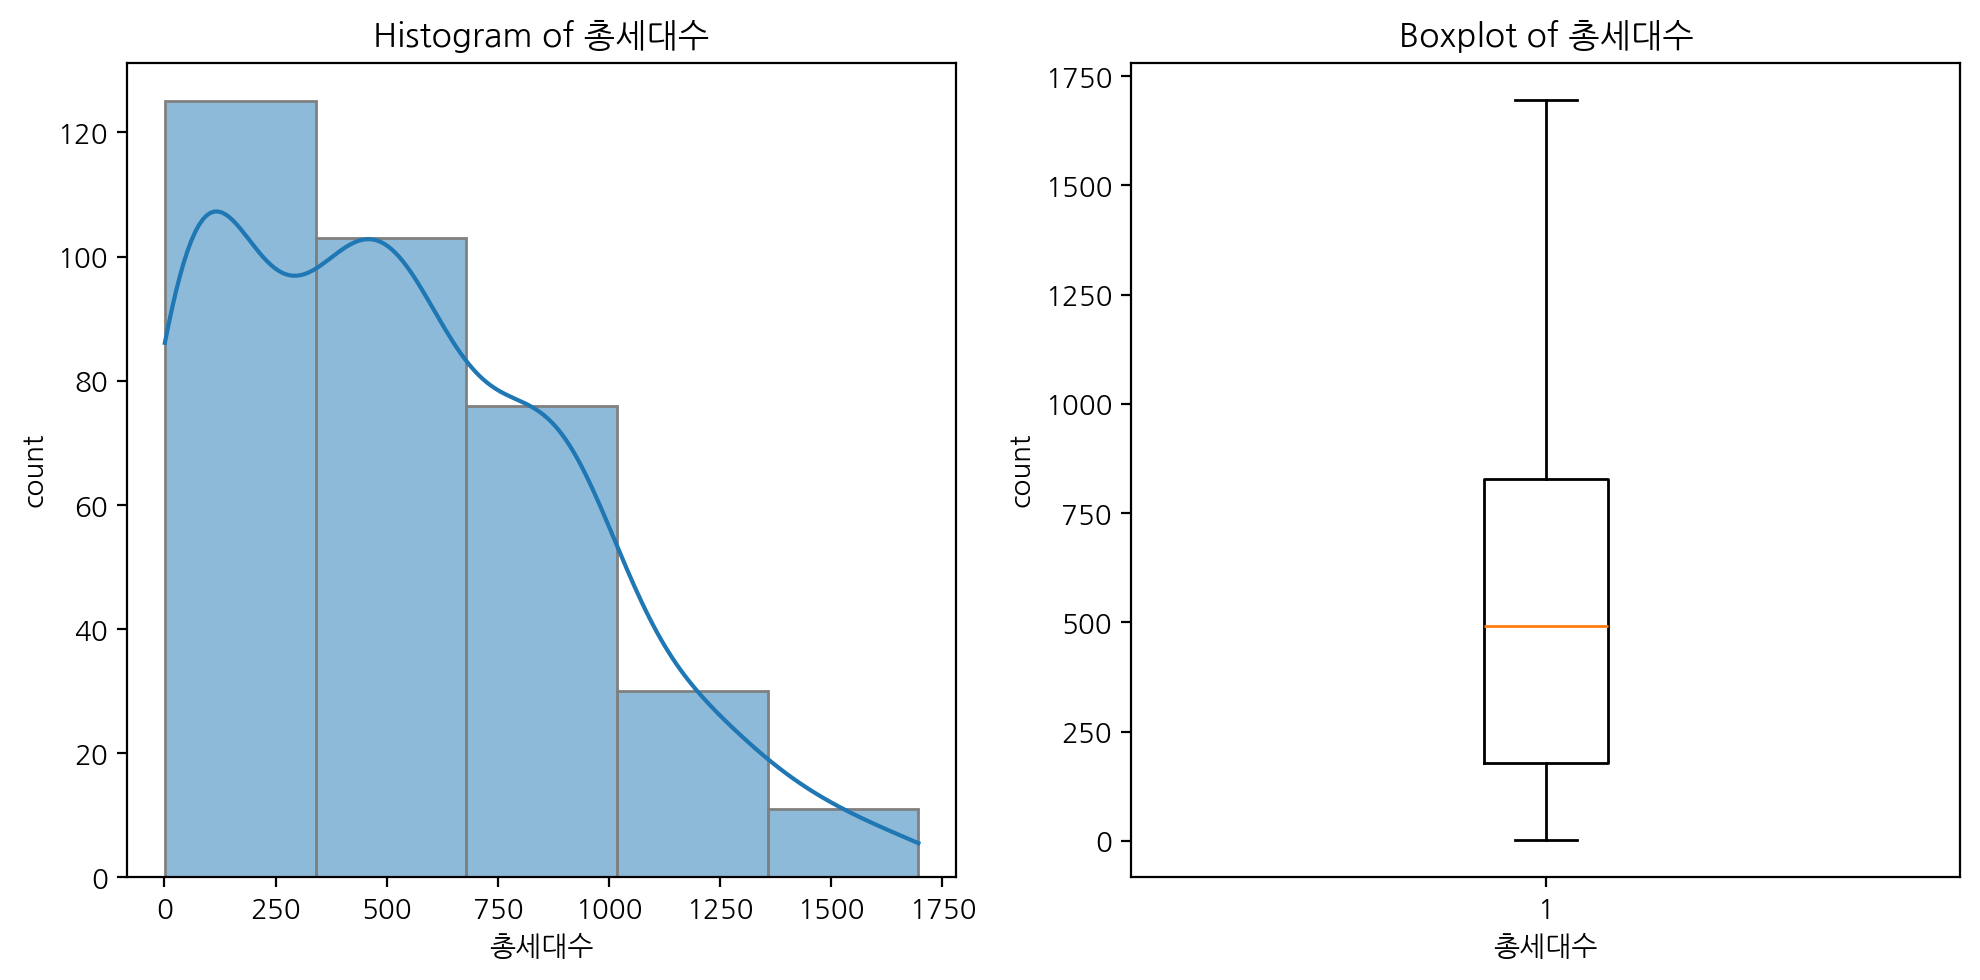

In [107]:
continuous(apart3,'총세대수')

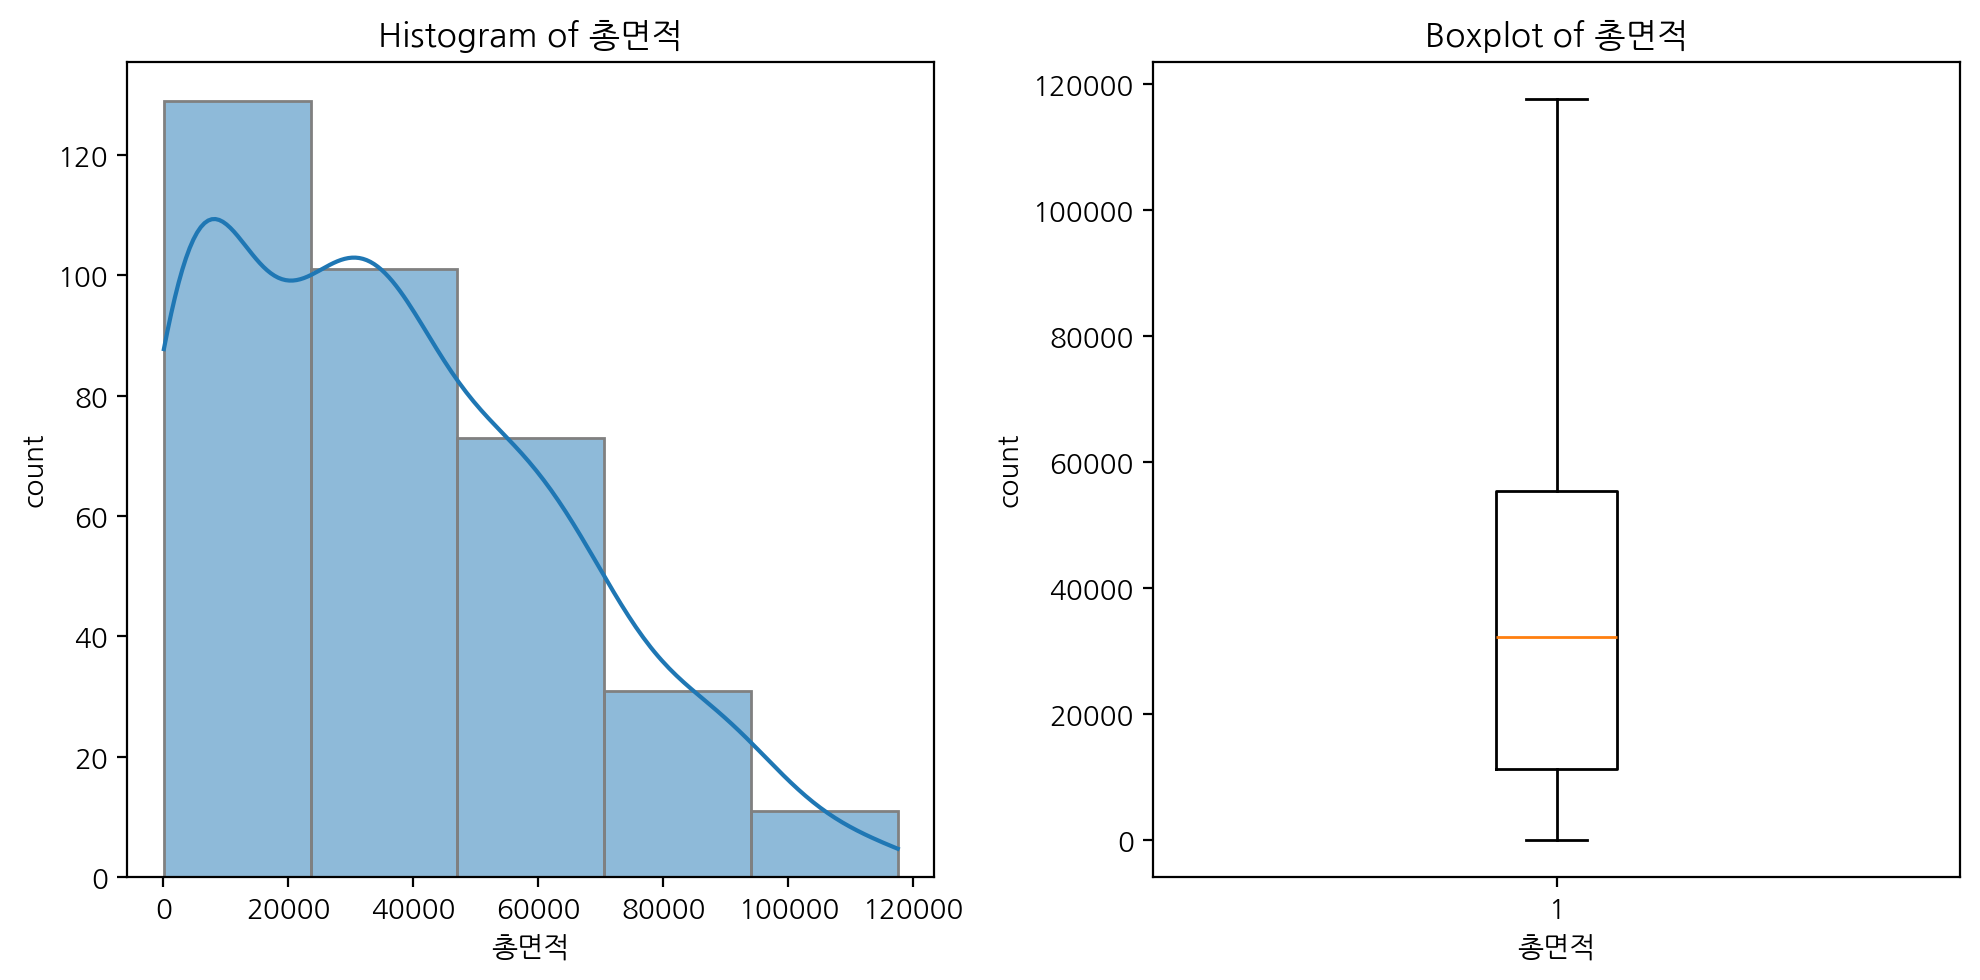

In [108]:
continuous(apart3,'총면적')

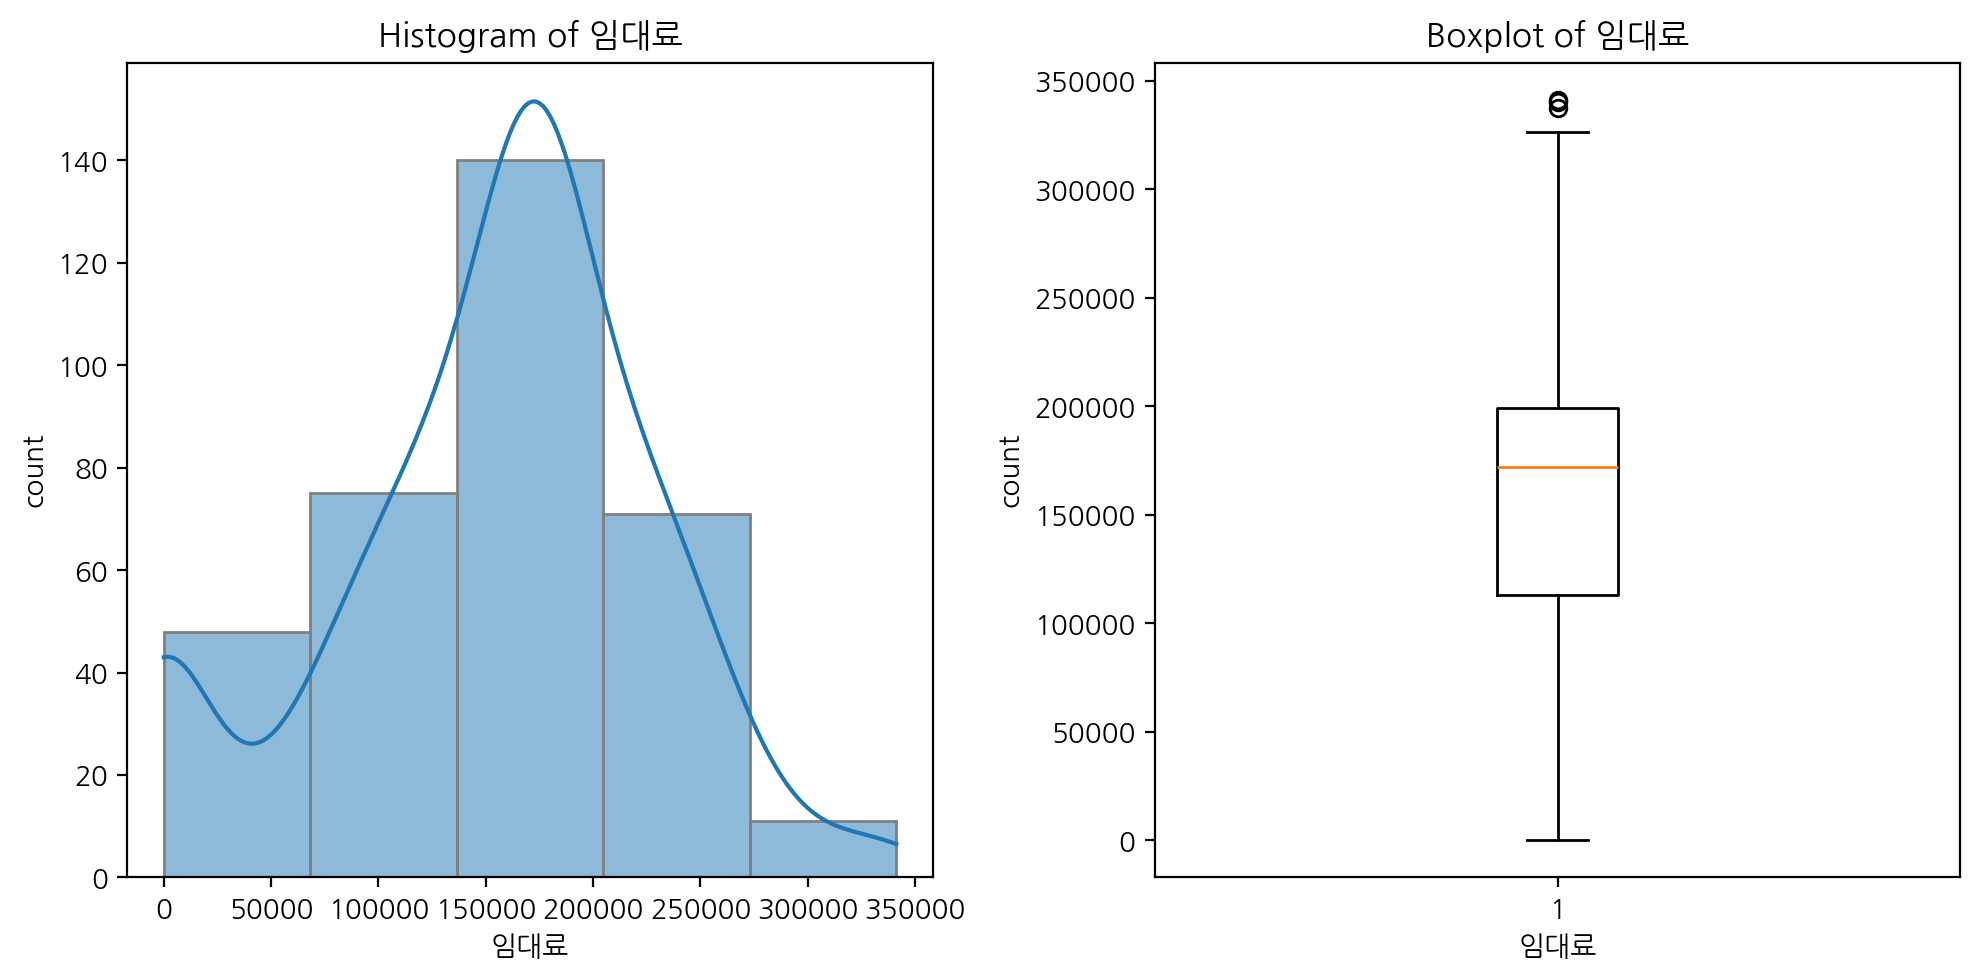

In [109]:
continuous(apart3,'임대료')

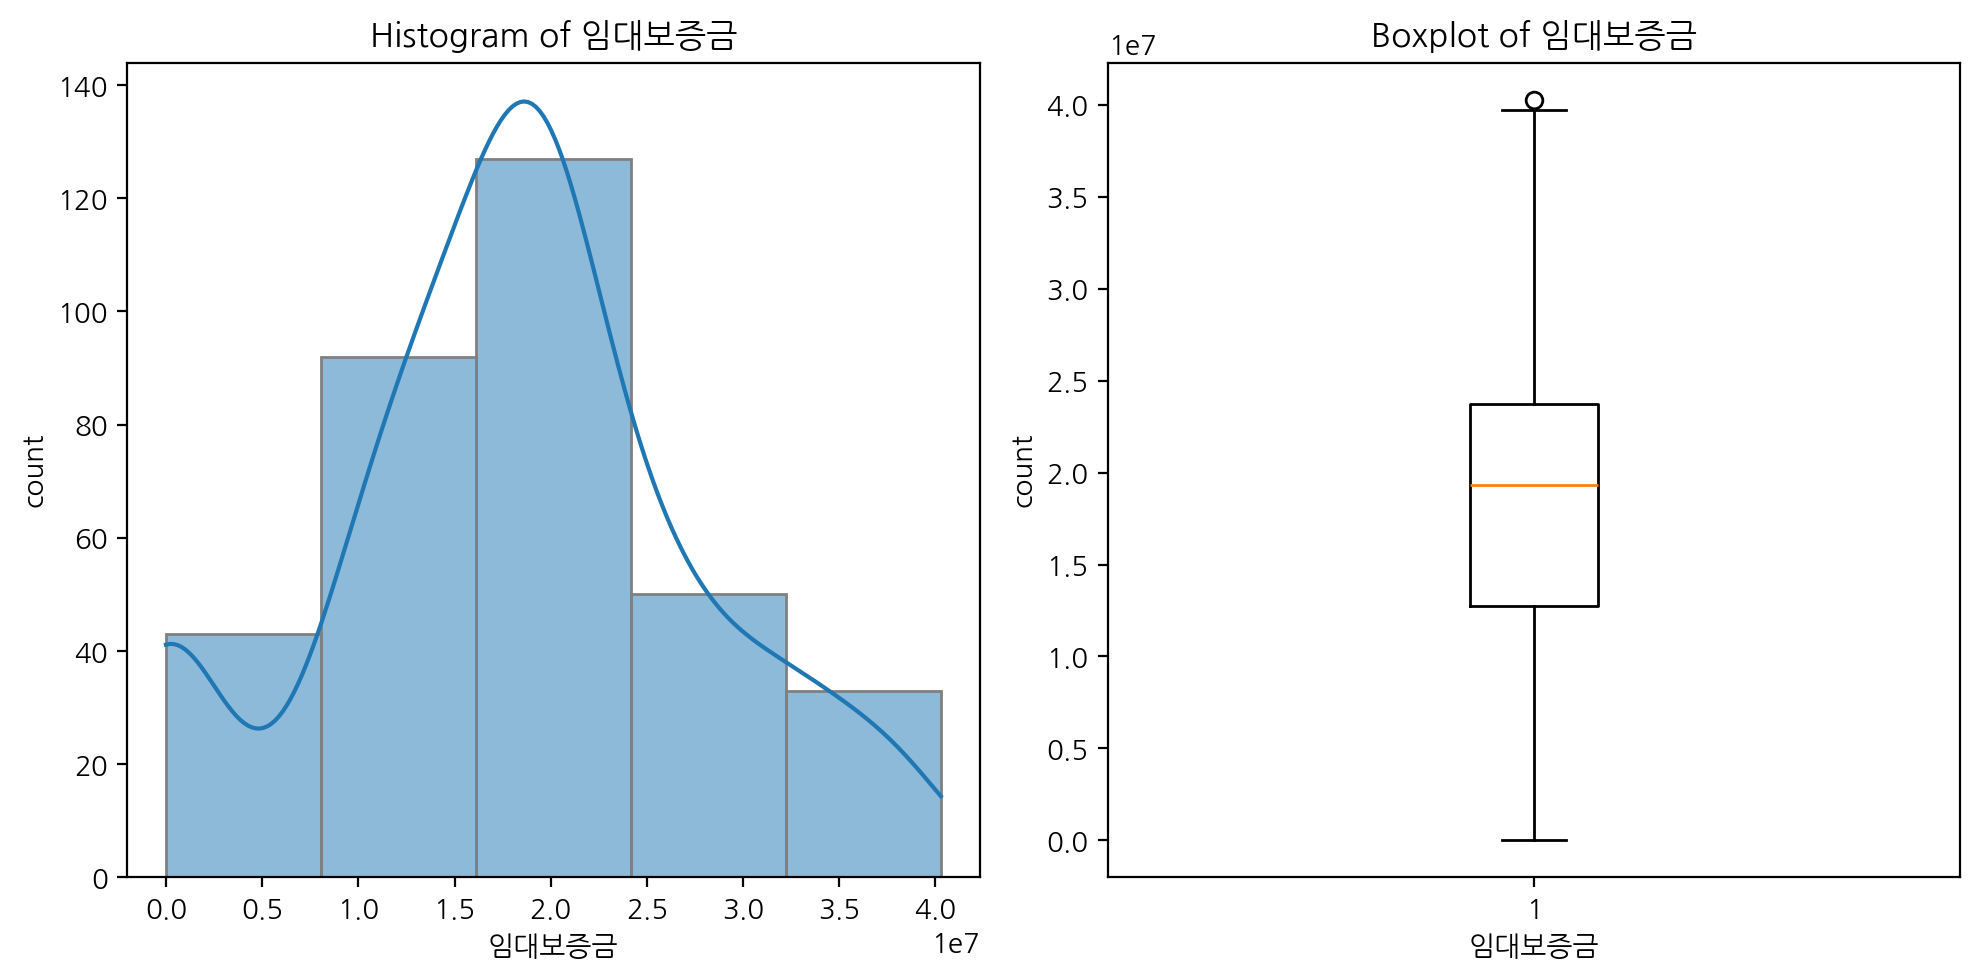

In [110]:
continuous(apart3,'임대보증금')

In [170]:
# 파일로 저장
joblib.dump(apart3, path+'base_data2(이상치제거).pkl')

['base_data2(이상치제거).pkl']